In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# List of file paths for the XPT files
file_path = ['/content/drive/MyDrive/ALQ_H.XPT', '/content/drive/MyDrive/BMX_H.xpt', '/content/drive/MyDrive/BPX_H.xpt', '/content/drive/MyDrive/CBQ_H.xpt', '/content/drive/MyDrive/CKQ_H.xpt', '/content/drive/MyDrive/DBQ_H.xpt', '/content/drive/MyDrive/DEMO_H.xpt', '/content/drive/MyDrive/DIQ_H.xpt', '/content/drive/MyDrive/DLQ_H.xpt', '/content/drive/MyDrive/DPQ_H.xpt', '/content/drive/MyDrive/DR1IFF_H.xpt', '/content/drive/MyDrive/DUQ_H.xpt', '/content/drive/MyDrive/ECQ_H.xpt', '/content/drive/MyDrive/FSQ_H.xpt', '/content/drive/MyDrive/HDL_H.xpt', '/content/drive/MyDrive/HOQ_H.xpt', '/content/drive/MyDrive/HSQ_H.xpt', '/content/drive/MyDrive/HUQ_H.xpt', '/content/drive/MyDrive/INQ_H.xpt', '/content/drive/MyDrive/KIQ_U_H.xpt', '/content/drive/MyDrive/OCQ_H.xpt', '/content/drive/MyDrive/PFQ_H.xpt', '/content/drive/MyDrive/SLQ_H.xpt', '/content/drive/MyDrive/SMQ_H.xpt']

new_prefix = '/content/drive/MyDrive/alcohol/newDataset'

modified_paths = [path.replace('/content/drive/MyDrive', new_prefix) for path in file_paths]
file_paths= modified_paths


# List to store the dataframes
dfs = []

# Read each XPT file and append the dataframe to the list
for file_path in file_paths:
    df = pd.read_sas(file_path, format='xport')
    dfs.append(df)

# Use SEQN as the common key to merge the DataFrames using an "outer" merge
combined_df = dfs[0]  # Start with the first DataFrame
for df in dfs[1:]:
    combined_df = pd.merge(combined_df, df, on='SEQN', how='outer')





In [ ]:

combined_df

,SEQN,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ141Q,ALQ141U,ALQ151,ALQ160,...,SMQ661,SMQ665A,SMQ665B,SMQ665C,SMQ665D,SMQ670,SMQ848,SMQ852Q,SMQ852U,SMAQUEX2
0,73557.0,1.0,NaN,1.000000e+00,3.0,1.0,5.397605e-79,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,73558.0,1.0,NaN,7.000000e+00,1.0,4.0,2.000000e+00,1.0,1.0,5.397605e-79,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0
2,73559.0,1.0,NaN,5.397605e-79,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,73561.0,1.0,NaN,5.397605e-79,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,73562.0,1.0,NaN,5.000000e+00,3.0,1.0,5.397605e-79,NaN,2.0,5.397605e-79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,79967.0,1.0,NaN,5.397605e-79,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3707,79969.0,1.0,NaN,1.000000e+00,2.0,5.0,1.000000e+00,2.0,2.0,5.397605e-79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3708,79970.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3709,79972.0,1.0,NaN,1.000000e+00,1.0,3.0,5.397605e-79,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
import numpy  as np

import re
import numpy  as np
def is_negative_exponential(floatValue):
    float_str = str(floatValue)
    pattern = re.compile(r'^[-+]?\d+\.\d+e-\d+$')
    return bool(pattern.match(float_str))
mask = combined_df.applymap(is_negative_exponential)
combined_df[mask] = np.nan

In [ ]:
combined_df

,SEQN,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ141Q,ALQ141U,ALQ151,ALQ160,...,SMQ661,SMQ665A,SMQ665B,SMQ665C,SMQ665D,SMQ670,SMQ848,SMQ852Q,SMQ852U,SMAQUEX2
0,73557.0,1.0,NaN,1.0,3.0,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,73558.0,1.0,NaN,7.0,1.0,4.0,2.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0
2,73559.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,73561.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,73562.0,1.0,NaN,5.0,3.0,1.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,79967.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3707,79969.0,1.0,NaN,1.0,2.0,5.0,1.0,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3708,79970.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3709,79972.0,1.0,NaN,1.0,1.0,3.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
import pandas as pd

# Set display options to show floating-point numbers with higher precision
pd.set_option('display.float_format', '{:.10f}'.format)

# ... rest of your code ...

# Display the DataFrame
print(combined_df)


                 SEQN       ALQ101       ALQ110      ALQ120Q      ALQ120U  \
0    73557.0000000000 1.0000000000          NaN 1.0000000000 3.0000000000   
1    73558.0000000000 1.0000000000          NaN 7.0000000000 1.0000000000   
2    73559.0000000000 1.0000000000          NaN          NaN          NaN   
3    73561.0000000000 1.0000000000          NaN          NaN          NaN   
4    73562.0000000000 1.0000000000          NaN 5.0000000000 3.0000000000   
...               ...          ...          ...          ...          ...   
3706 79967.0000000000 1.0000000000          NaN          NaN          NaN   
3707 79969.0000000000 1.0000000000          NaN 1.0000000000 2.0000000000   
3708 79970.0000000000 2.0000000000 2.0000000000          NaN          NaN   
3709 79972.0000000000 1.0000000000          NaN 1.0000000000 1.0000000000   
3710 79974.0000000000 1.0000000000          NaN          NaN          NaN   

           ALQ130      ALQ141Q      ALQ141U       ALQ151  ALQ160  ...  SMQ6

In [ ]:
# Assuming combined_df is your DataFrame
combined_df = combined_df.drop_duplicates(subset='SEQN')

# Optionally, reset index if needed
combined_df = combined_df.reset_index(drop=True)


In [ ]:

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Select variables that could be useful for alcohol and explanation
selected_variables = {
    'RIAGENDR': 'Gen',
    'RIDAGEYR': 'Age',
    'RIDAGEMN': 'Age_Mn',
    'DMDEDUC3': 'Edu_Child',
    'DMDEDUC2': 'HighestEducationLevel',
    'DMDMARTL': 'MaritalStatus',
    'DMDHHSIZ': 'HHSiz',
    'DMDFMSIZ': 'FamSiz',
    'DMDHHSZA': 'Child5',
    'DMDHHSZB': 'Child6_17',
    'INDHHIN2': 'HHIncome',
    'INDFMIN2': 'FamIncome',
    'INDFMPIR': 'Income_Pov',
    'DR1_020': 'EatTime',
    'DR1_030Z': 'EatOccasion',
    'DR1FS': 'FoodSource',
    'DR1_040Z': 'EatAtHome',
    'DR1ISUGR': 'Sugar',
    'DR1ITFAT': 'Fat',
    'DR1ICHOL': 'Cholesterol',
    'PEASCST1': 'BPStatus',
    'BMXWT': 'Weight',
    'BMXHT': 'Height',
    'BMXBMI': 'BMI',
    'LBDHDD': 'HDL',
    'LBDHDDSI': 'HDL_SI',
    'ALQ101': 'Alc_12mo',
    'DBQ700': 'Diet_Health',
    'DLQ040': 'Difficulty_Concentrating',
    'DUQ200': 'Marijuana',
    'DUQ217': 'Marijuana_Freq',
    'DUQ230': 'Marijuana_Days',
    'DUQ240': 'Coc_Her_Meth',
    'DUQ280': 'Coc_Days',
    'DUQ290': 'Heroin',
    'DUQ250': 'Coc_Use',
    'DUQ320': 'Heroin_Days',
    'DUQ330': 'Methamphetamine',
    'DUQ360': 'Meth_Days',
    'CBD120': 'EatOut_Money',
    'CBD130': 'Carryout_Money',
    'CBD110': 'OtherStores_Money',
    'CBD090': 'NonfoodItems_Money',
    'CBD070': 'Supermarket_Money',
    'CKQ020': 'Exercise_Sore',
    'HSD010': 'HealthStatus',
    'DIQ010': 'Diabetes',
    'DIQ175G': 'No_PhysicalActivity',
    'DIQ175H': 'HighBP',
    'DIQ175I': 'HighBloodSugar',
    'DIQ175J': 'HighCholesterol',
    'DIQ175N': 'BlurredVision',
    'DLQ010': 'Difficulty_Hearing',
    'DLQ020': 'Difficulty_Seeing',
    'DLQ040': 'Difficulty_Concentrating',
    'ECD010': 'Mother_AgeBirth',
    'ECQ020': 'Mother_Smoked_Pregnant',
    'FSD041': 'Adults_CutSize',
    'FSD052': 'Adults_CutSize_Freq',
    'FSD061': 'Adults_EatLess',
    'HUQ010': 'Health',
    'HUQ051': 'Healthcare_Freq',
    'HUQ071': 'Hospital_Overnight',
    'HUQ090': 'MentalHealth_Professional',
    'HOD050': 'Num_Rooms',
    'HOQ065': 'Home_Owned',
    'INQ020': 'Income_Wages',
    'INQ012': 'Income_SelfEmployment',
    'INQ030': 'Income_SocialSecurity',
    'INQ132': 'Income_CashAssistance',
    'IND235': 'Monthly_FamIncome',
    'INQ150': 'Income_Other',
    'INDFMMPI': 'FamPovIndex',
    'INDFMMPC': 'FamPovCategory',
    'INQ244': 'Savings_MoreThan5000',
    'IND247': 'TotalSavings',
    'KIQ022': 'Weak_Failing_Kidneys',
    'DPQ010': 'Interest_Little',
    'DPQ020': 'Feeling_Down',
    'DPQ030': 'Trouble_Sleeping',
    'DPQ040': 'Feeling_Tired',
    'DPQ050': 'Poor_Appetite',
    'DPQ060': 'Feeling_Bad',
    'DPQ070': 'Trouble_Concentrating',
    'DPQ080': 'Moving_Slowly',
    'OCQ180': 'Work_Hours_LastWeek',
    'OCQ210': 'Work_35+_HoursWeek',
    'OCD231': 'Industry_Code_CurrentJob',
    'OCD241': 'Occupation_Code_CurrentJob',
    'OCQ260': 'Job_Description',
    'OCD390G': 'LongestWork_Kind',
    'OCD391': 'Industry_Code_LongestJob',
    'OCD392': 'Occupation_Code_LongestJob',
    'OCD395': 'LongestJob_Duration',
    'PFQ051': 'Limited_Work_Capacity',
    'PFQ057': 'Confusion_Memory_Problems',
    'PFQ059': 'Physical_Mental_Limitations',
    'SLD010H': 'Sleep_Hours',
    'SLQ060': 'Sleep_Disorder',
    'SMQ040': 'Smoke_Cigarettes',
    'SMD641': 'Cigs_Days_Past30Days',
    'SMD650': 'Cigs_AvgPerDay_Past30Days',
}

columns_na_3 = [
    "Smoke_Cigarettes"
]


columns_na_7_9 = [
    "HighestEducationLevel",
    'HHSiz',
    'Alc_12mo',
    'Diet_Health',
'Difficulty_Concentrating',
'Marijuana',
'Marijuana_Freq',
'Coc_Her_Meth',
'Heroin',
'Coc_Use',
'Methamphetamine',
'Exercise_Sore',
'HealthStatus',
'Diabetes',
'Diet_Health',
'Difficulty_Hearing',
'Difficulty_Seeing',
'Difficulty_Concentrating',
'Mother_Smoked_Pregnant',
'Adults_CutSize',
'Adults_CutSize_Freq',
'Adults_EatLess',
'Health',
'Hospital_Overnight',
'MentalHealth_Professional',
'Home_Owned',
'Income_Wages',
'Income_SelfEmployment',
'Income_SocialSecurity',
'Income_CashAssistance',
'Income_Other',
'FamPovCategory',
'Savings_MoreThan5000',
'Weak_Failing_Kidneys',
'Interest_Little',
'Feeling_Down',
'Trouble_Sleeping',
'Feeling_Tired',
'Poor_Appetite',
'Feeling_Bad',
'Trouble_Concentrating',
'Moving_Slowly',
'Work_35+_HoursWeek',
'LongestWork_Kind',
'Limited_Work_Capacity',
'Confusion_Memory_Problems',
'Physical_Mental_Limitations',
'Sleep_Hours',
'Sleep_Disorder',
'Smoke_Cigarettes',
    'EatAtHome'

]

columns_na_77_99 = [
    'Edu_Child',
    'MaritalStatus',
    'HHIncome',
    'FamIncome',
    'Heroin_Days',
'Meth_Days',
'Healthcare_Freq',
'Monthly_FamIncome',
'TotalSavings',
'Job_Description',
'Cigs_Days_Past30Days',
    'FoodSource',
    'Sleep_Hours'

]

columns_na_777_999 = [
   'Marijuana_Days',
'Coc_Days',
'Num_Rooms',
'Cigs_AvgPerDay_Past30Days',

]

columns_na_7777_9999 = [
'Mother_AgeBirth'
]

columns_na_77777_99999 = [
'Work_Hours_LastWeek',
'LongestJob_Duration',

]

columns_na_777777_999999 = [
    'EatOut_Money',
'Carryout_Money',
'OtherStores_Money',
'NonfoodItems_Money',
'Supermarket_Money'
]

na_values_per_column = {
    "na_3": [ [3], columns_na_3 ],
    "na_7_9": ([7, 9], columns_na_7_9),
    "na_77_99": ([77, 99], columns_na_77_99),
    "na_777_999": ([777, 999], columns_na_777_999),
    "na_7777_9999": ([7777, 9999], columns_na_7777_9999),
    "na_77777_99999": ([77777, 99999], columns_na_77777_99999),
    "na_777777_999999": ([777777,999999],columns_na_777777_999999)
}

sti_variables = [

]

drug_variables = [
    "MarijuanaLast30d",
    "CocaineLast30d",
    "HeroineLast30d",
    "MethanfetamineLast30d",
    "SmokedCigsLast30d"
]

# Transform continuous column to boolean column
def transform_continuous_to_boolean(column):
    boolean_column = column.astype(bool)
    return boolean_column

# Fancy text title for plots
fancy_text_title = {"size": 14, "weight": "bold", "color": "chocolate"}

# Fancy text legend for plots
fancy_text_legend = {"size": 14, "weight": "bold", "color": "chocolate"}

# Fancy plot theme
def fancy_plot():
    return plt.rcParams.update({"axes.titlepad": 15,
                                "axes.titlecolor": "chocolate",
                                "axes.titlesize": 14,
                                "axes.titleweight": "bold"})

# Fancy plot without legend
def fancy_plot_no_legend():
    return plt.rcParams.update({"axes.titlepad": 15,
                                "axes.titlecolor": "chocolate",
                                "axes.titlesize": 14,
                                "axes.titleweight": "bold",
                                "legend": None})


# Select only selected columns
preprocessed_dataset = combined_df[list(selected_variables.keys())]

# Rename columns
preprocessed_dataset.columns = list(selected_variables.values())

original_dataset = preprocessed_dataset.copy()


# Replace specified values with NaN in the selected columns
for na_values, columns in na_values_per_column.values():
    for column in columns:
        preprocessed_dataset[column] = preprocessed_dataset[column].replace(na_values, np.nan)



# Convert variables into readable factors
print("Converting variables to custom readable factors...")
transformed_dataset = preprocessed_dataset.copy()


# Convert variables into readable factors
print("Converting variables to custom readable factors...")
transformed_dataset = preprocessed_dataset.copy()





Converting variables to custom readable factors...
Converting variables to custom readable factors...


<ipython-input-12-1c6cae8a6335>:276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_dataset[column] = preprocessed_dataset[column].replace(na_values, np.nan)


In [ ]:
categorical_variables = [
    'Num_Rooms', 'Healthcare_Freq', 'Mother_AgeBirth', 'Income_Pov', 'FamSiz', 'HHSiz',
    'Industry_Code_CurrentJob', 'Alc_12mo', 'Edu_Child', 'Age', 'Child5', 'Child6_17',
    'Occupation_Code_LongestJob', 'Industry_Code_LongestJob', 'LongestWork_Kind',
    'Job_Description','Interest_Little', 'Savings_MoreThan5000', 'FamPovCategory', 'Income_Other',
    'Monthly_FamIncome', 'Weak_Failing_Kidneys', 'Confusion_Memory_Problems',
    'Feeling_Tired', 'Trouble_Sleeping', 'Feeling_Down', 'Income_CashAssistance', 'Income_SocialSecurity', 'Income_SelfEmployment',
    'Income_Wages', 'Home_Owned', 'MentalHealth_Professional', 'Hospital_Overnight', 'Health',
    'Mother_Smoked_Pregnant', 'Difficulty_Seeing', 'Difficulty_Hearing', 'Diabetes', 'HealthStatus',
    'Diet_Health', 'EatAtHome', 'FoodSource',
    'EatOccasion', 'FamIncome', 'HighestEducationLevel',  'Smoke_Cigarettes','Sleep_Disorder',
    'Sleep_Hours','Physical_Mental_Limitations','Limited_Work_Capacity','Work_35+_HoursWeek',
    'Moving_Slowly','Trouble_Concentrating', 'Feeling_Bad','Poor_Appetite',
    'TotalSavings', 'Adults_EatLess', 'Adults_CutSize','BlurredVision',
    'HighCholesterol', 'HighBloodSugar', 'HighBP', 'No_PhysicalActivity', 'Exercise_Sore', 'Meth_Days', 'Methamphetamine',
    'Heroin_Days', 'Coc_Use', 'Heroin', 'Coc_Days', 'Coc_Her_Meth', 'Marijuana_Freq','Marijuana' , 'Difficulty_Concentrating',
    'BPStatus',   'HHIncome', 'MaritalStatus']


In [ ]:
print("Number of columns in transformed_dataset:", transformed_dataset.shape[1])
print("Number of categorical variables:", len(categorical_variables))


Number of columns in transformed_dataset: 101
Number of categorical variables: 77


In [ ]:
transformed_dataset[categorical_variables] = transformed_dataset[categorical_variables].astype('category')


In [ ]:
transformed_dataset['Num_Rooms']

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0       4.0000000000
1       7.0000000000
2       6.0000000000
3       5.0000000000
4       8.0000000000
            ...     
3706             NaN
3707    6.0000000000
3708    8.0000000000
3709    5.0000000000
3710   10.0000000000
Name: Num_Rooms, Length: 3711, dtype: category
Categories (13, float64): [1.0000000000, 2.0000000000, 3.0000000000, 4.0000000000, ..., 10.0000000000,
                           11.0000000000, 12.0000000000, 13.0000000000]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset, replace 'your_dataset.csv' with your actual data file
# transformed_dataset = pd.read_csv('your_dataset.csv')

# Calculate missing values for each column
missing_values = transformed_dataset.isnull().sum()
categorical_columns = [
    'Num_Rooms', 'Healthcare_Freq', 'Mother_AgeBirth', 'Income_Pov', 'FamSiz', 'HHSiz',
    'Industry_Code_CurrentJob', 'Alc_12mo', 'Edu_Child', 'Age', 'Child5', 'Child6_17',
    'Occupation_Code_LongestJob', 'Industry_Code_LongestJob', 'LongestWork_Kind',
    'Job_Description','Interest_Little', 'Savings_MoreThan5000', 'FamPovCategory', 'Income_Other',
    'Monthly_FamIncome', 'Weak_Failing_Kidneys', 'Confusion_Memory_Problems',
    'Feeling_Tired', 'Trouble_Sleeping', 'Feeling_Down', 'Income_CashAssistance', 'Income_SocialSecurity', 'Income_SelfEmployment',
    'Income_Wages', 'Home_Owned', 'MentalHealth_Professional', 'Hospital_Overnight', 'Health',
    'Mother_Smoked_Pregnant', 'Difficulty_Seeing', 'Difficulty_Hearing', 'Diabetes', 'HealthStatus',
    'Diet_Health', 'EatAtHome', 'FoodSource',
    'EatOccasion', 'FamIncome', 'HighestEducationLevel',  'Smoke_Cigarettes','Sleep_Disorder',
    'Sleep_Hours','Physical_Mental_Limitations','Limited_Work_Capacity','Work_35+_HoursWeek',
    'Moving_Slowly','Trouble_Concentrating', 'Feeling_Bad','Poor_Appetite',
    'TotalSavings', 'Adults_EatLess', 'Adults_CutSize','BlurredVision',
    'HighCholesterol', 'HighBloodSugar', 'HighBP', 'No_PhysicalActivity', 'Exercise_Sore', 'Meth_Days', 'Methamphetamine',
    'Heroin_Days', 'Coc_Use', 'Heroin', 'Coc_Days', 'Coc_Her_Meth', 'Marijuana_Freq','Marijuana' , 'Difficulty_Concentrating',
    'BPStatus',   'HHIncome', 'MaritalStatus']
transformed_dataset[categorical_columns] = transformed_dataset[categorical_columns].astype('category')
for column in categorical_columns:
    numerical_columns = transformed_dataset.columns.difference(categorical_columns)

# Convert to numeric data type and impute missing values in numerical variables
for column in numerical_columns:
    transformed_dataset[column] = pd.to_numeric(transformed_dataset[column], errors='coerce')

# Calculate the percentage of missing values for categorical columns
categorical_missing_percentage = (transformed_dataset[categorical_columns].isnull().sum() / len(transformed_dataset)) * 100

# Calculate the percentage of missing values for numerical columns
numerical_missing_percentage = (transformed_dataset[numerical_columns].isnull().sum() / len(transformed_dataset)) * 100

# Create DataFrames to store the missing percentages
categorical_missing_df = pd.DataFrame({'Column_Name': categorical_columns, 'Missing_Percentage': categorical_missing_percentage})
numerical_missing_df = pd.DataFrame({'Column_Name': numerical_columns, 'Missing_Percentage': numerical_missing_percentage})

# Print the missing percentages for categorical columns
print("Missing Values for Categorical Columns:")
print(categorical_missing_df)

# Print the missing percentages for numerical columns
print("Missing Values for Numerical Columns:")
print(numerical_missing_df)



Missing Values for Categorical Columns:
                                       Column_Name  Missing_Percentage
Num_Rooms                                Num_Rooms        1.7246025330
Healthcare_Freq                    Healthcare_Freq       13.0423066559
Mother_AgeBirth                    Mother_AgeBirth        1.1587173269
Income_Pov                              Income_Pov        8.8924818108
FamSiz                                      FamSiz        0.0000000000
...                                            ...                 ...
Marijuana                                Marijuana       26.8660738345
Difficulty_Concentrating  Difficulty_Concentrating       11.2368633791
BPStatus                                  BPStatus        0.0000000000
HHIncome                                  HHIncome        4.7965507949
MaritalStatus                        MaritalStatus       44.2198868230

[77 rows x 2 columns]
Missing Values for Numerical Columns:
                                           Colu

In [ ]:
import pandas as pd
import numpy as np

# Load your dataset
# Assuming your dataset is loaded into a DataFrame called 'transformed_dataset'

# Define a function to replace scientific notation values with 0
def replace_scientific_notation(value):
    if isinstance(value, str) and 'e-' in value:
        return 0
    return value

# Apply the function to the entire DataFrame
transformed_dataset = transformed_dataset.applymap(replace_scientific_notation)

# Now you can proceed with your data preprocessing and analysis


In [ ]:
categorical_columns = [
    'Num_Rooms', 'Healthcare_Freq', 'Mother_AgeBirth', 'Income_Pov', 'FamSiz', 'HHSiz',
    'Industry_Code_CurrentJob', 'Alc_12mo', 'Edu_Child', 'Age', 'Child5', 'Child6_17',
    'Occupation_Code_LongestJob', 'Industry_Code_LongestJob', 'LongestWork_Kind',
    'Job_Description','Interest_Little', 'Savings_MoreThan5000', 'FamPovCategory', 'Income_Other',
    'Monthly_FamIncome', 'Weak_Failing_Kidneys', 'Confusion_Memory_Problems',
    'Feeling_Tired', 'Trouble_Sleeping', 'Feeling_Down', 'Income_CashAssistance', 'Income_SocialSecurity', 'Income_SelfEmployment',
    'Income_Wages', 'Home_Owned', 'MentalHealth_Professional', 'Hospital_Overnight', 'Health',
    'Mother_Smoked_Pregnant', 'Difficulty_Seeing', 'Difficulty_Hearing', 'Diabetes', 'HealthStatus',
    'Diet_Health', 'EatAtHome', 'FoodSource',
    'EatOccasion', 'FamIncome', 'HighestEducationLevel',  'Smoke_Cigarettes','Sleep_Disorder',
    'Sleep_Hours','Physical_Mental_Limitations','Limited_Work_Capacity','Work_35+_HoursWeek',
    'Moving_Slowly','Trouble_Concentrating', 'Feeling_Bad','Poor_Appetite',
    'TotalSavings', 'Adults_EatLess', 'Adults_CutSize','BlurredVision',
    'HighCholesterol', 'HighBloodSugar', 'HighBP', 'No_PhysicalActivity', 'Exercise_Sore', 'Meth_Days', 'Methamphetamine',
    'Heroin_Days', 'Coc_Use', 'Heroin', 'Coc_Days', 'Coc_Her_Meth', 'Marijuana_Freq','Marijuana' , 'Difficulty_Concentrating',
    'BPStatus',   'HHIncome', 'MaritalStatus']
transformed_dataset[categorical_columns] = transformed_dataset[categorical_columns].astype('category')
# Impute missing values in the target variable 'Alc_12mo' with mode


In [ ]:
import pandas as pd

# Load your dataset here
# transformed_dataset = pd.read_csv('your_dataset.csv')

# Previous code for converting columns and calculating missing percentages
# ...
# Calculate the missing percentage for each column in the entire dataset
total_missing_percentage = (transformed_dataset.isnull().sum() / len(transformed_dataset)) * 100
# Drop columns with missing percentage greater than 50
columns_to_drop = total_missing_percentage[total_missing_percentage > 50].index
transformed_dataset.drop(columns=columns_to_drop, inplace=True)
categorical_missing_df['Column_Name'] = categorical_missing_df['Column_Name'].astype('category')
# Impute missing values in categorical columns with mode (most frequent value)
for column in categorical_missing_df['Column_Name']:
    if categorical_missing_df.loc[categorical_missing_df['Column_Name'] == column, 'Missing_Percentage'].iloc[0] < 50:
        mode_value = transformed_dataset[column].mode()[0]
        transformed_dataset[column].fillna(mode_value, inplace=True)
        transformed_dataset[column] = transformed_dataset[column].astype('category')

# Impute missing values in numerical columns with mean
for column in numerical_missing_df['Column_Name']:
    if numerical_missing_df.loc[numerical_missing_df['Column_Name'] == column, 'Missing_Percentage'].iloc[0] < 50:
        mean_value = transformed_dataset[column].mean()
        transformed_dataset[column].fillna(mean_value, inplace=True)

# Print the modified dataset
print(transformed_dataset)


              Gen           Age HighestEducationLevel MaritalStatus  \
0    1.0000000000 69.0000000000          3.0000000000  4.0000000000   
1    1.0000000000 54.0000000000          3.0000000000  1.0000000000   
2    1.0000000000 72.0000000000          4.0000000000  1.0000000000   
3    1.0000000000  9.0000000000          4.0000000000  1.0000000000   
4    2.0000000000 73.0000000000          5.0000000000  1.0000000000   
...           ...           ...                   ...           ...   
3706 2.0000000000 44.0000000000          1.0000000000  1.0000000000   
3707 2.0000000000 15.0000000000          4.0000000000  1.0000000000   
3708 2.0000000000 41.0000000000          5.0000000000  1.0000000000   
3709 1.0000000000  4.0000000000          4.0000000000  1.0000000000   
3710 2.0000000000 17.0000000000          4.0000000000  1.0000000000   

            HHSiz       FamSiz    Child6_17      HHIncome     FamIncome  \
0    3.0000000000 3.0000000000 1.0000000000  4.0000000000  4.0000000000 

In [ ]:
# Count the number of null values in each column
null_counts = transformed_dataset.isnull().sum()

# Print columns with their corresponding null counts
print(null_counts)


Gen                          0
Age                          0
HighestEducationLevel        0
MaritalStatus                0
HHSiz                        0
                            ..
LongestJob_Duration          0
Limited_Work_Capacity        0
Confusion_Memory_Problems    0
Sleep_Hours                  0
Sleep_Disorder               0
Length: 63, dtype: int64


In [ ]:
transformed_dataset['Alc_12mo'].unique()

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


[1.0000000000, 2.0000000000]
Categories (2, float64): [1.0000000000, 2.0000000000]

In [ ]:

missing_values = transformed_dataset.isnull().sum()

# Calculate the missing percentage for each column in the entire dataset
total_missing_percentage = (missing_values / len(transformed_dataset)) * 100

# Separate columns with missing values into categorical and numerical
categorical_missing = total_missing_percentage[total_missing_percentage > 0].index

# Drop columns with missing percentage greater than 50
columns_to_drop = total_missing_percentage[total_missing_percentage > 50].index
transformed_dataset.drop(columns=columns_to_drop, inplace=True)

# Impute missing values in categorical columns with mode (most frequent value)
for column in categorical_missing:
    transformed_dataset[column] = transformed_dataset[column].astype('category')
    mode_value = transformed_dataset[column].mode()[0]
    if column == 'Alc_12mo':
        # Remove rows with missing target values
        transformed_dataset.dropna(subset=['Alc_12mo'], inplace=True)
        transformed_dataset = transformed_dataset[transformed_dataset['Alc_12mo'].isin([1, 2])]
    else:
        transformed_dataset[column].fillna(mode_value, inplace=True)


# Impute missing values in numerical columns with mean
numerical_columns = transformed_dataset.columns.difference(categorical_missing)
# Convert to numeric data type and impute missing values in numerical variables
for column in numerical_columns:
    transformed_dataset[column] = pd.to_numeric(transformed_dataset[column], errors='coerce')
    mean_value = transformed_dataset[column].mean()
    transformed_dataset[column].fillna(mean_value, inplace=True)


# Check if the DataFrame still contains missing values
if transformed_dataset.isnull().any().any():
    print("DataFrame still contains missing values.")
else:
    print("DataFrame does not contain missing values.")


DataFrame does not contain missing values.


In [ ]:
# Count the number of null values in each column
null_counts = transformed_dataset.isnull().sum()

# Print columns with their corresponding null counts
print(null_counts)


Gen                          0
Age                          0
HighestEducationLevel        0
MaritalStatus                0
HHSiz                        0
                            ..
LongestJob_Duration          0
Limited_Work_Capacity        0
Confusion_Memory_Problems    0
Sleep_Hours                  0
Sleep_Disorder               0
Length: 63, dtype: int64


In [ ]:
import pandas as pd

# Assuming transformed_dataset is your DataFrame

# Iterate through columns and print unique values
for column in transformed_dataset.columns:
    unique_values = transformed_dataset[column].unique()
    print(f"Unique values in {column}:", unique_values)


Unique values in Gen: [1. 2.]
Unique values in Age: [69. 54. 72.  9. 73. 56. 80. 61. 42. 65. 26. 76. 10. 33.  1. 16. 32. 18.
 12. 38. 50. 23.  7. 13. 28.  4. 14. 11. 35.  2.  6. 29.  3. 58. 57. 20.
 37. 75. 43. 60. 55. 62. 36. 31. 63. 71. 67. 64.  8. 46. 44. 19. 70. 59.
 25. 39.  5. 24. 30. 49. 45. 51. 77. 78. 66. 79. 47. 48. 53. 15. 17. 21.
 68. 52. 34. 40. 27. 41. 22. 74.]
Unique values in HighestEducationLevel: [3. 4. 5. 2. 1.]
Unique values in MaritalStatus: [4. 1. 3. 2. 5. 6.]
Unique values in HHSiz: [3. 4. 2. 1. 5. 6.]
Unique values in FamSiz: [3. 4. 2. 1. 7. 5. 6.]
Unique values in Child6_17: [1. 2. 3. 4.]
Unique values in HHIncome: [ 4.  7. 10.  9. 15.  3.  5. 14.  2.  8. 12.  6. 13.  1.]
Unique values in FamIncome: [ 4.  7. 10.  9. 15.  3.  5. 14.  2.  8. 12.  6. 13.  1.]
Unique values in Income_Pov: [0.84 1.78 4.51 2.52 5.   4.79 0.48 1.2  0.41 1.79 2.1  0.76 1.58 0.29
 0.58 2.97 0.69 3.07 2.26 1.27 3.33 1.54 1.74 0.8  2.14 4.19 0.45 3.09
 2.18 1.52 0.63 3.82 3.77 2.44 4.25 3

In [ ]:
import pandas as pd

# Assuming transformed_dataset is your DataFrame

categorical_columns_uni= []
numerical_columns_uni = []

# Iterate through columns and check unique values to determine type
for column in transformed_dataset.columns:
    unique_values = transformed_dataset[column].unique()

    # If the number of unique values is less than a threshold, consider it categorical
    if len(unique_values) <= 25:  # You can adjust the threshold as needed
        categorical_columns_uni.append(column)
    else:
        numerical_columns_uni.append(column)

# Print the lists of categorical and numerical columns
print("Categorical Columns:", categorical_columns_uni)
print("Numerical Columns:", numerical_columns_uni)


Categorical Columns: ['Gen', 'HighestEducationLevel', 'MaritalStatus', 'HHSiz', 'FamSiz', 'Child6_17', 'HHIncome', 'FamIncome', 'EatOccasion', 'FoodSource', 'EatAtHome', 'BPStatus', 'Alc_12mo', 'Diet_Health', 'Difficulty_Concentrating', 'Marijuana', 'Coc_Her_Meth', 'HealthStatus', 'Diabetes', 'Difficulty_Hearing', 'Difficulty_Seeing', 'Mother_Smoked_Pregnant', 'Health', 'Healthcare_Freq', 'Hospital_Overnight', 'MentalHealth_Professional', 'Num_Rooms', 'Home_Owned', 'Income_Wages', 'Income_SelfEmployment', 'Income_SocialSecurity', 'Income_CashAssistance', 'Monthly_FamIncome', 'Income_Other', 'FamPovCategory', 'Savings_MoreThan5000', 'Weak_Failing_Kidneys', 'Industry_Code_CurrentJob', 'Occupation_Code_CurrentJob', 'Job_Description', 'LongestWork_Kind', 'Industry_Code_LongestJob', 'Occupation_Code_LongestJob', 'Limited_Work_Capacity', 'Confusion_Memory_Problems', 'Sleep_Hours', 'Sleep_Disorder']
Numerical Columns: ['Age', 'Income_Pov', 'EatTime', 'Sugar', 'Fat', 'Weight', 'Height', 'BMI',

In [ ]:
Occupation_Code_LongestJob_mapping = {
    1: 'Management Occupations',
    2: 'Business, Financial Operations Occupations',
    3: 'Computer, Mathematical Occupations',
    4: 'Architecture, Engineering Occupations',
    5: 'Life, Physical, Social Science Occupations',
    6: 'Community, Social Services Occupations',
    7: 'Legal Occupations',
    8: 'Education, Training, Library Occupations',
    9: 'Arts, Design, Entertainment, Sports, Media Occupations',
    10: 'Healthcare Practitioner, Technical Occupations',
    11: 'Healthcare Support Occupations',
    12: 'Protective Service Occupations',
    13: 'Food Preparation, Serving Occupations',
    14: 'Building & Grounds Cleaning, Maintenance Occupations',
    15: 'Personal Care, Service Occupations',
    16: 'Sales & Related Occupations',
    17: 'Office, Administrative Support Occupations',
    18: 'Farming, Fishing, Forestry Occupations',
    19: 'Construction, Extraction Occupations',
    20: 'Installation, Maintenance, Repair Occupations',
    21: 'Production Occupations',
    22: 'Transportation, Material Moving Occupations',
    23: 'Armed Forces',
}


Industry_Code_LongestJob_mapping  = {
    1: 'Agriculture, Forestry, Fishing',
    2: 'Mining',
    3: 'Utilities',
    4: 'Construction',
    5: 'Manufacturing: Durable Good',
    6: 'Manufacturing: Non-Durable Goods',
    7: 'Wholesale Trade',
    8: 'Retail Trade',
    9: 'Transportation, Warehousing',
    10: 'Information',
    11: 'Finance, Insurance',
    12: 'Real Estate, Rental, Leasing',
    13: 'Professional, Technical Services',
    14: 'Management, Business, Cleaning/Waste Services',
    15: 'Education Services',
    16: 'Health Care, Social Assistance',
    17: 'Arts, Entertainment, Recreation',
    18: 'Accommodation, Food Services',
    19: 'Other Services',
    20: 'Private Households',
    21: 'Public Administration',
    22: 'Armed Forces',
}
LongestWork_Kind_mapping = {
    1: 'Enter occupation',
    2: 'Same as current occupation',
    3: 'Armed forces',
    4: 'Never worked',
    7: 'Refused',
    9: "Don't know",
}

Job_Description_mapping = {
    1: 'Employee of a private company, business, or individual',
    2: 'Federal government employee',
    3: 'State government employee',
    4: 'Local government employee',
    5: 'Self-employed in own business, professional practice or farm',
    6: 'Working without pay in family business or farm',
    77: 'Refused',
    99: "Don't know",
}

Occupation_Code_CurrentJob_mapping = {
 1: 'Management Occupations',
    2: 'Business, Financial Operations Occupations',
    3: 'Computer, Mathematical Occupations',
    4: 'Architecture, Engineering Occupations',
    5: 'Life, Physical, Social Science Occupations',
    6: 'Community, Social Services Occupations',
    7: 'Legal Occupations',
    8: 'Education, Training, Library Occupations',
    9: 'Arts, Design, Entertainment, Sports, Media Occupations',
    10: 'Healthcare Practitioner, Technical Occupations',
    11: 'Healthcare Support Occupations',
    12: 'Protective Service Occupations',
    13: 'Food Preparation, Serving Occupations',
    14: 'Building & Grounds Cleaning, Maintenance Occupations',
    15: 'Personal Care, Service Occupations',
    16: 'Sales & Related Occupations',
    17: 'Office, Administrative Support Occupations',
    18: 'Farming, Fishing, Forestry Occupations',
    19: 'Construction, Extraction Occupations',
    20: 'Installation, Maintenance, Repair Occupations',
    21: 'Production Occupations',
    22: 'Transportation, Material Moving Occupations',
    23: 'Armed Forces',
}
Weak_Failing_Kidneys_mapping  ={

 '1': 'Yes',
        '2': 'No',
        '7': 'Refused',
        '9': "Don't know",
        '.': 'Missing'
}


Sleep_Disorder_mapping = {
        '1': 'Yes',
        '2': 'No',
        '7': 'Refused',
        '9': "Don't know",
        '.': 'Missing'
    }


Confusion_Memory_Problems_mapping =  {
        1: 'Yes',
        2: 'No',
        7: 'Refused',
        9: "Don't know",
        '.': 'Missing'
    }


Limited_Work_Capacity_mapping = {
        1: 'Yes',
        2: 'No',
        7: 'Refused',
        9: "Don't know",
        '.': 'Missing'
    }

Trouble_Concentrating_mapping = {
        0: 'Not at all',
        1: 'Several days',
        2: 'More than half the days',
        3: 'Nearly every day',
        7: 'Refused',
        9: "Don't know"
    }

Feeling_Bad_mapping =      {
        0: 'Not at all',
        1: 'Several days',
        2: 'More than half the days',
        3: 'Nearly every day',
        7: 'Refused',
        9: "Don't know"
    }

Poor_Appetite_mapping =  {
        0: 'Not at all',
        1: 'Several days',
        2: 'More than half the days',
        3: 'Nearly every day',
        7: 'Refused',
        9: "Don't know"
    }

Feeling_Tired_mapping =  {
        0: 'Not at all',
        1: 'Several days',
        2: 'More than half the days',
        3: 'Nearly every day',
        7: 'Refused',
        9: "Don't know"
    }

Trouble_Sleeping_mapping = {
        0: 'Not at all',
        1: 'Several days',
        2: 'More than half the days',
        3: 'Nearly every day',
        7: 'Refused',
        9: "Don't know"

    }

Feeling_Down_mapping =  {
        0: 'Not at all',
        1: 'Several days',
        2: 'More than half the days',
        3: 'Nearly every day',
        7: 'Refused',
        9: "Don't know"
    }

Interest_Little_mapping = {
        0: 'Not at all',
        1: 'Several days',
        2: 'More than half the days',
        3: 'Nearly every day',
        7: 'Refused',
        9: "Don't know"
    }

Savings_MoreThan5000_mapping =  {
    1: 'Yes',
    2: 'No',
    7: 'Refused',
    9: "Don't know",
}

FamPovCategory_mapping = {
    1: 'Monthly poverty level index <= 1.30',
    2: '1.30 < Monthly poverty level index <= 1.85',
    3: 'Monthly poverty level index > 1.85',
    7: 'Refused',
    9: "Don't Know",
}

Income_Other_mapping =  {
    1: 'Yes',
    2: 'No',
    7: 'Refused',
    9: "Don't know",
}

Monthly_FamIncome_mapping = {
    1: '$0 - $399',
    2: '$400 - $799',
    3: '$800 - $1249',
    4: '$1250 - $1649',
    5: '$1650 - $2099',
    6: '$2100 - $2899',
    7: '$2900 - $3749',
    8: '$3750 - $4599',
    9: '$4600 - $5399',
    10: '$5400 - $6249',
    11: '$6250 - $8399',
    12: '$8400 and over',
    77: 'Refused',
    99: "Don't know",
}


 # Mapping dictionaries
Income_CashAssistance_mapping = {
    1: 'Yes',
    2: 'No',
    7: 'Refused',
    9: "Don't know",
}

Income_SocialSecurity_mapping = {
    1: 'Yes',
    2: 'No',
    7: 'Refused',
    9: "Don't know",
}

Income_SelfEmployment_mapping = {
    1: 'Yes',
    2: 'No',
    7: 'Refused',
    9: "Don't know",
}

Income_Wages_mapping = {
    1: 'Yes',
    2: 'No',
    7: 'Refused',
    9: "Don't know",
}

Home_Owned_mapping = {
    1: 'Owned or being bought',
    2: 'Rented',
    3: 'Other arrangement',
    7: 'Refused',
    9: "Don't know",
}

MentalHealth_Professional_mapping = {
    1: 'Yes',
    2: 'No',
    7: 'Refused',
    9: "Don't know",
}

Hospital_Overnight_mapping = {
    1: 'Yes',
    2: 'No',
    7: 'Refused',
    9: "Don't know",
}

Health_mapping = {
    1: 'Excellent',
    2: 'Very good',
    3: 'Good',
    4: 'Fair',
    5: 'Poor',
    7: 'Refused',
    9: "Don't know",
}

Mother_Smoked_Pregnant_mapping = {
    1: 'Yes',
    2: 'No',
    7: 'Refused',
    9: "Don't know",
}

Difficulty_Seeing_mapping = {
    1: 'Yes',
    2: 'No',
}

Difficulty_Hearing_mapping = {
    1: 'Yes',
    2: 'No',
}

Diabetes_mapping = {
    1: 'Yes',
    2: 'No',
    3: 'Borderline',
    7: 'Refused',
    9: "Don't know",
}

HealthStatus_mapping = {
    1: 'Excellent',
    2: 'Very good',
    3: 'Good',
    4: 'Fair',
    5: 'Poor',
}

Coc_Her_Meth_mapping = {
    1: 'Yes',
    2: 'No',
}



Marijuana_mapping = {
    1: 'Yes',
    2: 'No',
}

Difficulty_Concentrating_mapping = {
    1: 'Yes',
    2: 'No',
}

Diet_Health_mapping = {
    1: 'Excellent',
    2: 'Very good',
    3: 'Good',
    4: 'Fair',
    5: 'Poor',
}

EatAtHome_mapping = {
    1: "Yes",
    2: "No",
    7: "Refused",
    9: "Don't know",
    ".Missing": "Missing",
}

FoodSource_mapping = {
    1: "Store - grocery/supermarket",
    2: "Restaurant with waiter/waitress",
    3: "Restaurant fast food/pizza",
    4: "Bar/tavern/lounge",
    5: "Restaurant no additional information",
    6: "Cafeteria NOT in a K-12 school",
    7: "Cafeteria in a K-12 school",
    8: "Child/Adult care center",
    9: "Child/Adult home care",
    10: "Soup kitchen/shelter/food pantry",
    11: "Meals on Wheels",
    12: "Community food program - other",
    13: "Community program no additional information",
    14: "Vending machine",
    15: "Common coffee pot or snack tray",
    16: "From someone else/gift",
    17: "Mail order purchase",
    18: "Residential dining facility",
    19: "Grown or caught by you or someone you know",
    20: "Fish caught by you or someone you know",
    24: "Sport, recreation, or entertainment facility",
    25: "Street vendor, vending truck",
    26: "Fundraiser sales",
    27: "Store - convenience type",
    28: "Store - no additional info",
    91: "Other, specify",
    99: "Don't know",
    ".Missing": "Missing",
}

EatOccasion_mapping = {
    1: "Breakfast",
    2: "Lunch",
    3: "Dinner",
    4: "Supper",
    5: "Brunch",
    6: "Snack",
    7: "Drink",
    8: "Infant feeding",
    9: "Extended consumption",
    10: "Desayano",
    11: "Almuerzo",
    12: "Comida",
    13: "Merienda",
    14: "Cena",
    15: "Entre comida",
    16: "Botana",
    17: "Bocadillo",
    18: "Tentempie",
    19: "Bebida",
    91: "Other",
    99: "Don't know",
    ".Missing": "Missing",
}

FamIncome_mapping = {
    1: "$ 0 to $ 4,999",
    2: "$ 5,000 to $ 9,999",
    3: "$10,000 to $14,999",
    4: "$15,000 to $19,999",
    5: "$20,000 to $24,999",
    6: "$25,000 to $34,999",
    7: "$35,000 to $44,999",
    8: "$45,000 to $54,999",
    9: "$55,000 to $64,999",
    10: "$65,000 to $74,999",
    12: "$20,000 and Over",
    13: "Under $20,000",
    14: "$75,000 to $99,999",
    15: "$100,000 and Over",
    77: "Refused",
    99: "Don't know",
}

Comb_FoodType_mapping = {
    0: "Non-combination food",
    1: "Beverage w/ additions",
    2: "Cereal w/ additions",
    3: "Bread/baked products w/ additions",
    4: "Salad",
    5: "Sandwiches",
    7: "Frozen meals",
    8: "Ice cream/frozen yogurt w/ additions",
    9: "Dried beans and vegetable w/ additions",
    10: "Fruit w/ additions",
    11: "Tortilla products",
    12: "Meat, poultry, fish",
    13: "Lunchables®",
    90: "Other mixtures",
    ".Missing": "Missing",
}

HighestEducationLevel_mapping = {
    1: "Less than 9th grade",
    2: "9-11th grade (Includes 12th grade with no diploma)",
    3: "High school graduate/GED or equivalent",
    4: "Some college or AA degree",
    5: "College graduate or above",
    7: "Refused",
    9: "Don't Know",
}

MaritalStatus_mapping = {
    1: "Married",
    2: "Widowed",
    3: "Divorced",
    4: "Separated",
    5: "Never married",
    6: "Living with partner",
    77: "Refused",
    99: "Don't Know",
}

HHIncome_mapping = {
    1: "$ 0 to $ 4,999",
    2: "$ 5,000 to $ 9,999",
    3: "$10,000 to $14,999",
    4: "$15,000 to $19,999",
    5: "$20,000 to $24,999",
    6: "$25,000 to $34,999",
    7: "$35,000 to $44,999",
    8: "$45,000 to $54,999",
    9: "$55,000 to $64,999",
    12: "$20,000 and Over",
    13: "Under $20,000",
    14: "$75,000 to $99,999",
    15: "$100,000 and Over",
    77: "Refused",
    99: "Don't know",
}
Child5_mapping = {
    0: '0',
    1: '1',
    2: '2',
    3: '3 or more',
    # If you have missing values, you can add them here.
    # For example, if missing value code is 9:
    9: 'Missing'
}
Child6_17_mapping = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4 or more',
    # If you have missing values, you can add them here.
    # For example, if missing value code is 9:
    9: 'Missing'
}

education_mapping = {
    0: 'Never attended / kindergarten only',
    1: '1st grade',
    2: '2nd grade',
    3: '3rd grade',
    4: '4th grade',
    5: '5th grade',
    6: '6th grade',
    7: '7th grade',
    8: '8th grade',
    9: '9th grade',
    10: '10th grade',
    11: '11th grade',
    12: '12th grade, no diploma',
    13: 'High school graduate',
    14: 'GED or equivalent',
    15: 'More than high school',
    55: 'Less than 5th grade',
    66: 'Less than 9th grade',
    77: 'Refused',
    99: "Don't Know",
    100: 'Unknown',  # For values outside the defined range
}
# Define a mapping dictionary
alcohol_mapping = {
    1: 'Yes',
    2: 'No',
    7: 'Refused',
    9: "Don't know",
    # Add more mappings if needed
}

gender_mapping = {
    1: 'Male',
    2: 'Female',
}

hhsize_mapping = {
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6'}

famsize_mapping = {
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6'}

Bp_status_mapping = {
    1: 'Completed',
    2: 'Partial',
    3: 'Not done'
}

Healthcare_Freq_mapping = {
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',

}

Hospital_Overnight_mapping = {
    1: 'Yes',
    2: 'No',
}
Num_Rooms_mapping = {
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10',
    11: '11',
    12: '12'
}
transformed_dataset['Num_Rooms'] = transformed_dataset['Num_Rooms'].map(Num_Rooms_mapping)

transformed_dataset['Hospital_Overnight'] = transformed_dataset['Hospital_Overnight'].map(Hospital_Overnight_mapping)

transformed_dataset['Child6_17'] = transformed_dataset['Child6_17'].map(Child6_17_mapping)

transformed_dataset['Difficulty_Concentrating'] = transformed_dataset['Difficulty_Concentrating'].map(Difficulty_Concentrating_mapping)

transformed_dataset['Healthcare_Freq'] = transformed_dataset['Healthcare_Freq'].map(Healthcare_Freq_mapping)

transformed_dataset['BPStatus'] = transformed_dataset['BPStatus'].map(Bp_status_mapping)

transformed_dataset[' FamSiz'] = transformed_dataset['FamSiz'].map(famsize_mapping)

transformed_dataset[' HHSiz'] = transformed_dataset['HHSiz'].map(hhsize_mapping)

transformed_dataset['Gen'] = transformed_dataset['Gen'].map(gender_mapping)

# Map the numeric values to their string labels
transformed_dataset['Alc_12mo'] = transformed_dataset['Alc_12mo'].map(alcohol_mapping)


# Apply the mapping to 'RIDAGEYR' column




transformed_dataset['LongestWork_Kind'] = transformed_dataset['LongestWork_Kind'].map(LongestWork_Kind_mapping)

transformed_dataset['Savings_MoreThan5000'] = transformed_dataset['Savings_MoreThan5000'].map(Savings_MoreThan5000_mapping)
transformed_dataset['FamPovCategory'] = transformed_dataset['FamPovCategory'].map(FamPovCategory_mapping)
transformed_dataset['Income_Other'] = transformed_dataset['Income_Other'].map(Income_Other_mapping)
transformed_dataset['Monthly_FamIncome'] = transformed_dataset['Monthly_FamIncome'].map(Monthly_FamIncome_mapping)

transformed_dataset['Weak_Failing_Kidneys'] = transformed_dataset['Weak_Failing_Kidneys'].map(Weak_Failing_Kidneys_mapping)
transformed_dataset['Sleep_Disorder'] = transformed_dataset['Sleep_Disorder'].map(Sleep_Disorder_mapping)
transformed_dataset['Confusion_Memory_Problems'] = transformed_dataset['Confusion_Memory_Problems'].map(Confusion_Memory_Problems_mapping)
transformed_dataset['Limited_Work_Capacity'] = transformed_dataset['Limited_Work_Capacity'].map(Limited_Work_Capacity_mapping)

transformed_dataset['Income_CashAssistance'] = transformed_dataset['Income_CashAssistance'].map(Income_CashAssistance_mapping)
transformed_dataset['Income_SocialSecurity'] = transformed_dataset['Income_SocialSecurity'].map(Income_SocialSecurity_mapping)
transformed_dataset['Income_SelfEmployment'] = transformed_dataset['Income_SelfEmployment'].map(Income_SelfEmployment_mapping)
transformed_dataset['Income_Wages'] = transformed_dataset['Income_Wages'].map(Income_Wages_mapping)
transformed_dataset['Home_Owned'] = transformed_dataset['Home_Owned'].map(Home_Owned_mapping)
transformed_dataset['MentalHealth_Professional'] = transformed_dataset['MentalHealth_Professional'].map(MentalHealth_Professional_mapping)
transformed_dataset['Hospital_Overnight'] = transformed_dataset['Hospital_Overnight'].map(Hospital_Overnight_mapping)
transformed_dataset['Health'] = transformed_dataset['Health'].map(Health_mapping)
transformed_dataset['Difficulty_Seeing'] = transformed_dataset['Difficulty_Seeing'].map(Difficulty_Seeing_mapping)
transformed_dataset['Difficulty_Hearing'] = transformed_dataset['Difficulty_Hearing'].map(Difficulty_Hearing_mapping)
transformed_dataset['Diabetes'] = transformed_dataset['Diabetes'].map(Diabetes_mapping)
transformed_dataset['HealthStatus'] = transformed_dataset['HealthStatus'].map(HealthStatus_mapping)

transformed_dataset['Diet_Health'] = transformed_dataset['Diet_Health'].map(Diet_Health_mapping)
transformed_dataset['EatAtHome'] = transformed_dataset['EatAtHome'].map(EatAtHome_mapping)
transformed_dataset['FoodSource'] = transformed_dataset['FoodSource'].map(FoodSource_mapping)
transformed_dataset['EatOccasion'] = transformed_dataset['EatOccasion'].map(EatOccasion_mapping)
transformed_dataset['FamIncome'] = transformed_dataset['FamIncome'].map(FamIncome_mapping)
transformed_dataset['HighestEducationLevel'] = transformed_dataset['HighestEducationLevel'].map(HighestEducationLevel_mapping)
transformed_dataset['MaritalStatus'] = transformed_dataset['MaritalStatus'].map(MaritalStatus_mapping)
transformed_dataset['HHIncome'] = transformed_dataset['HHIncome'].map(HHIncome_mapping)




<Figure size 1000x1000 with 0 Axes>

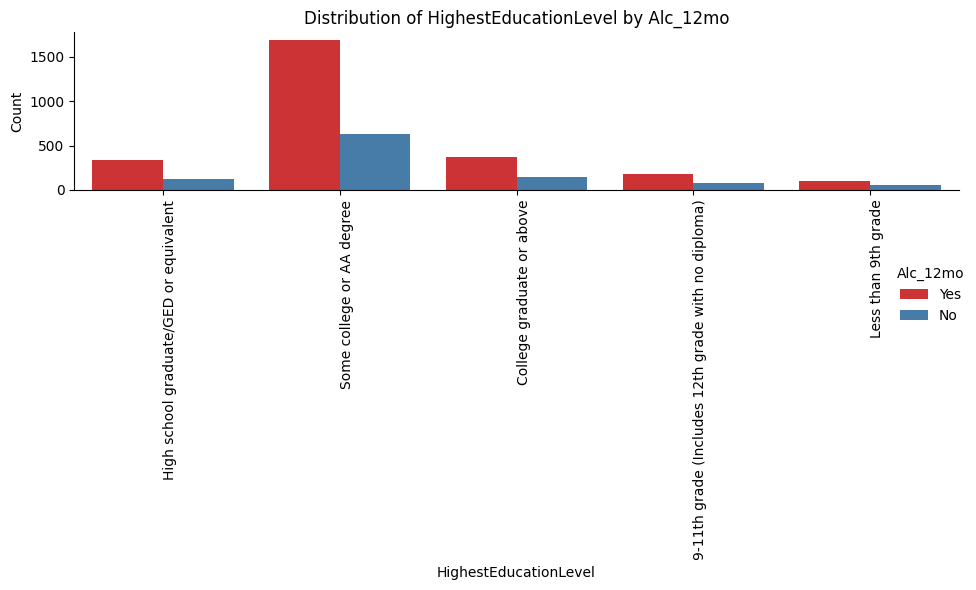

<Figure size 1000x1000 with 0 Axes>

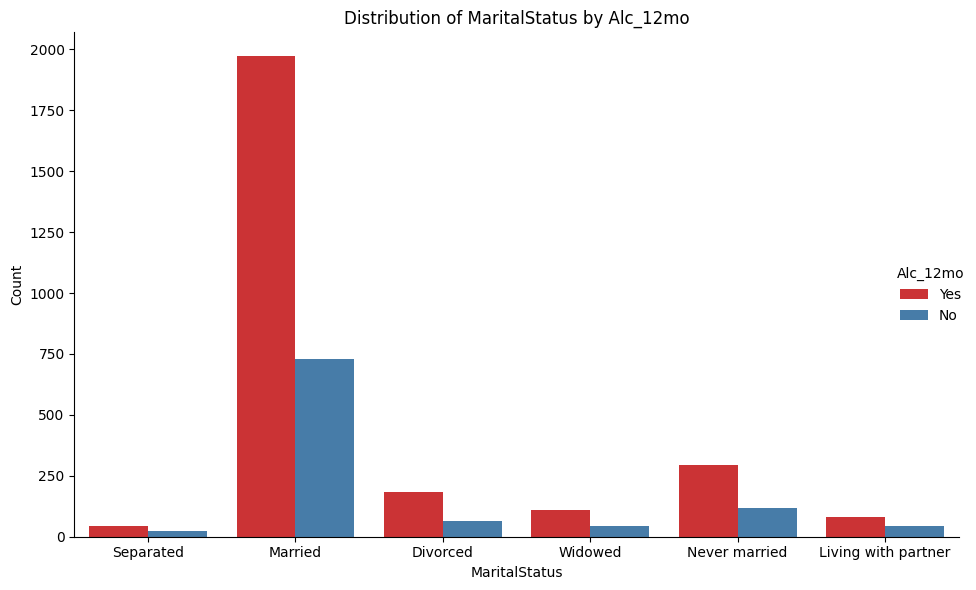

<Figure size 1000x1000 with 0 Axes>

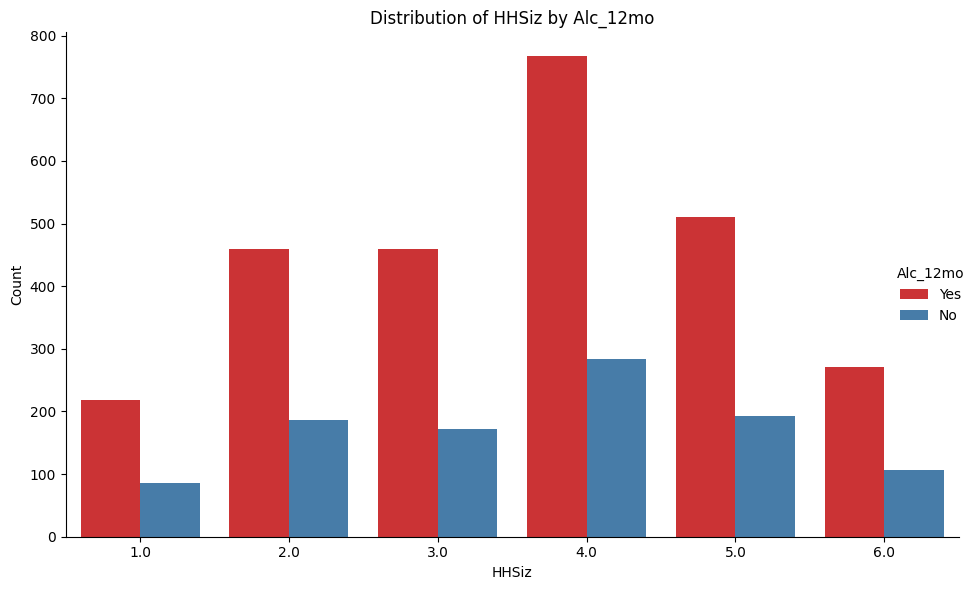

<Figure size 1000x1000 with 0 Axes>

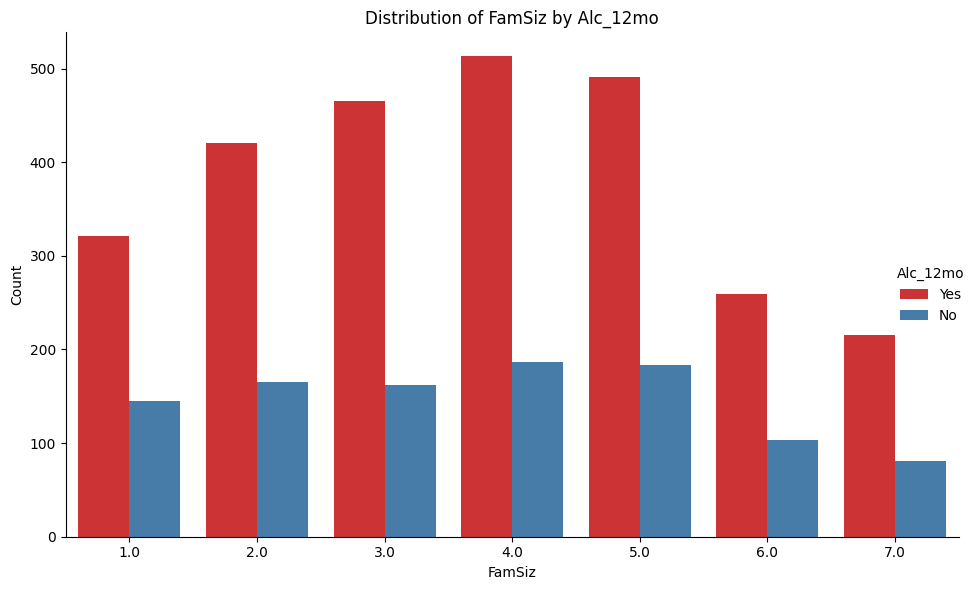

<Figure size 1000x1000 with 0 Axes>

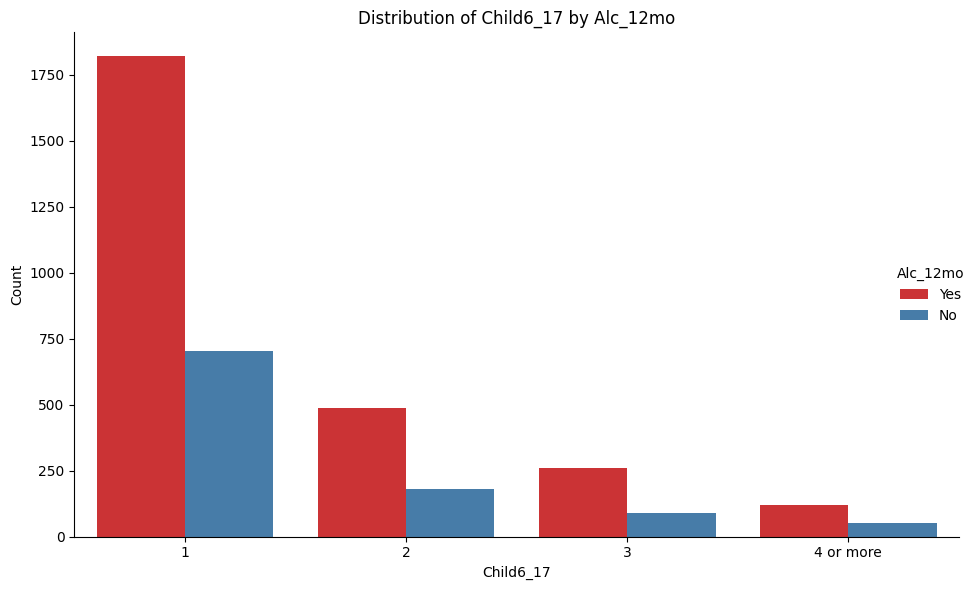

<Figure size 1000x1000 with 0 Axes>

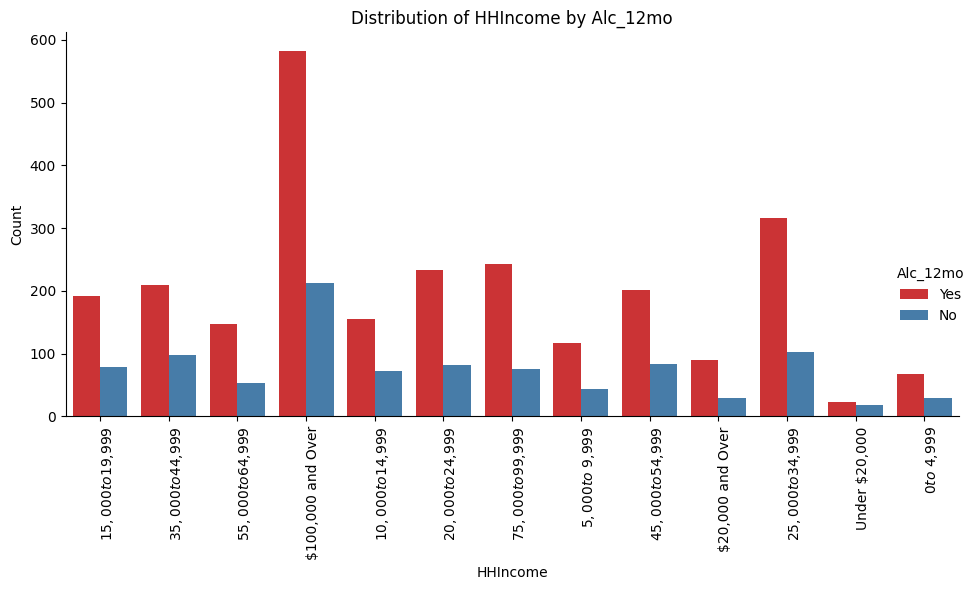

<Figure size 1000x1000 with 0 Axes>

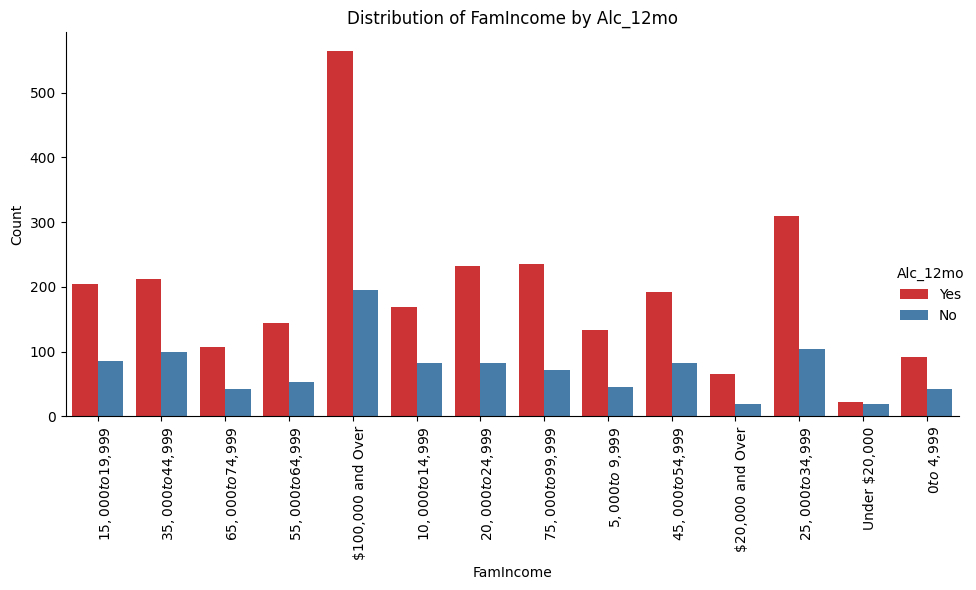

<Figure size 1000x1000 with 0 Axes>

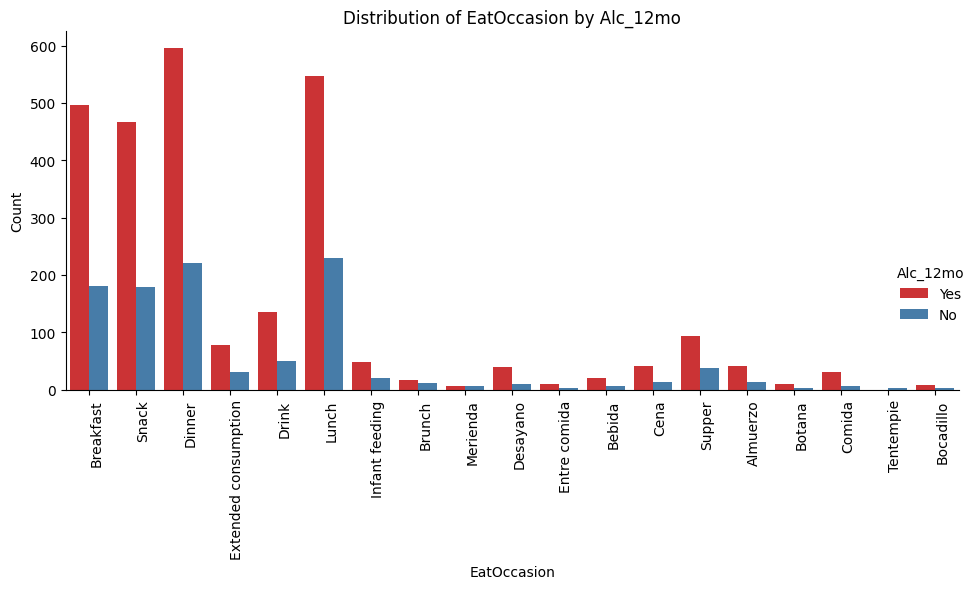

<Figure size 1000x1000 with 0 Axes>

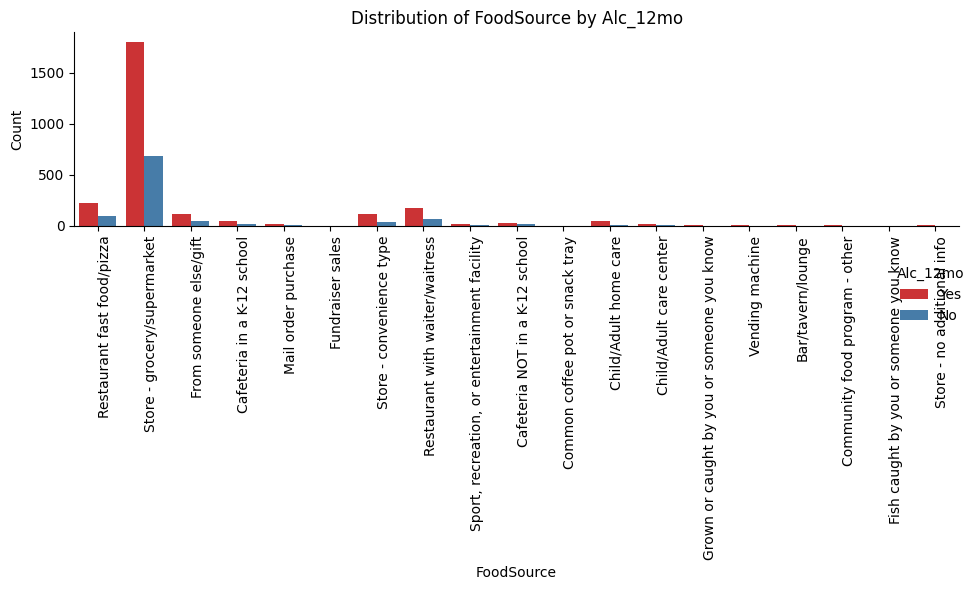

<Figure size 1000x1000 with 0 Axes>

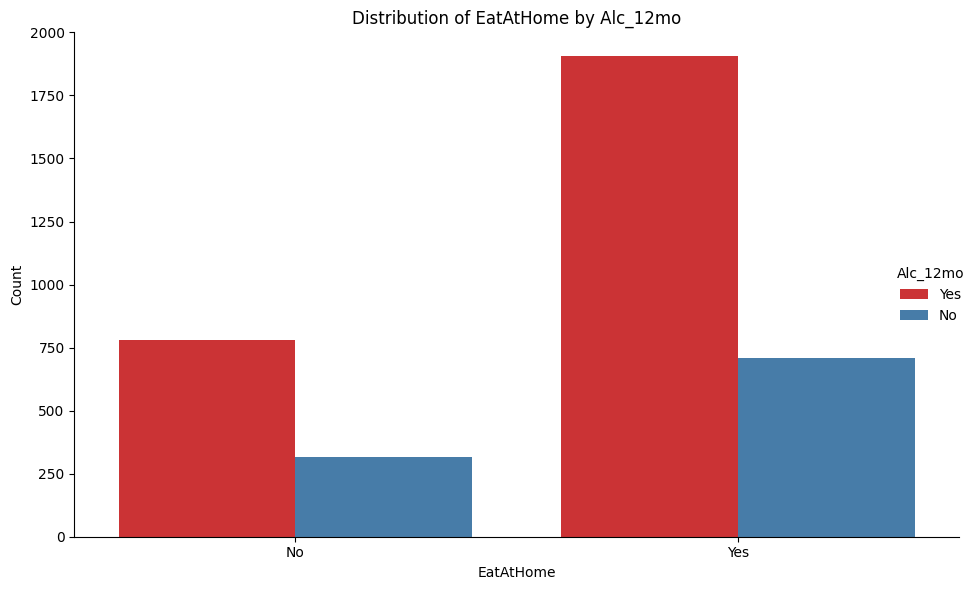

<Figure size 1000x1000 with 0 Axes>

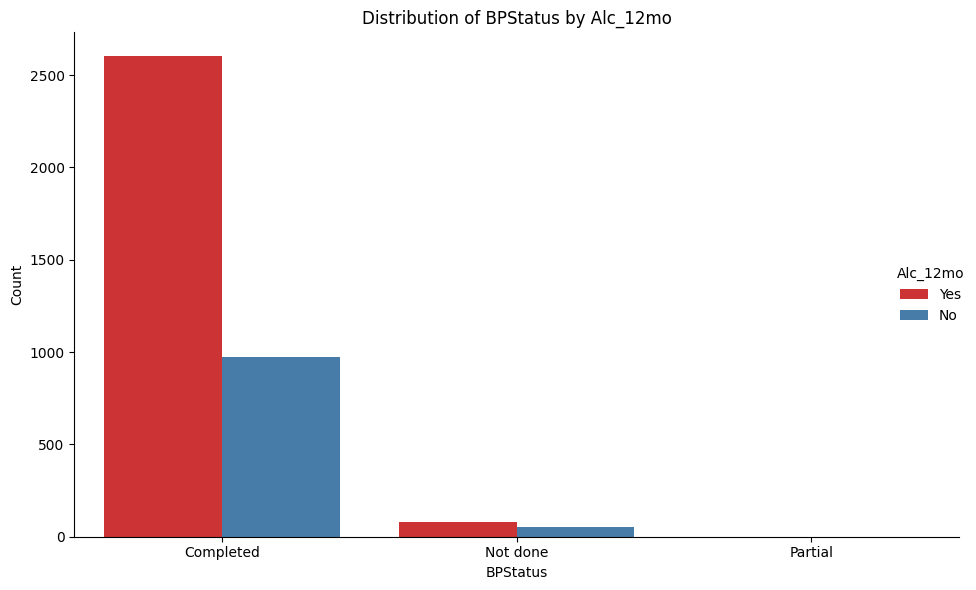

<Figure size 1000x1000 with 0 Axes>

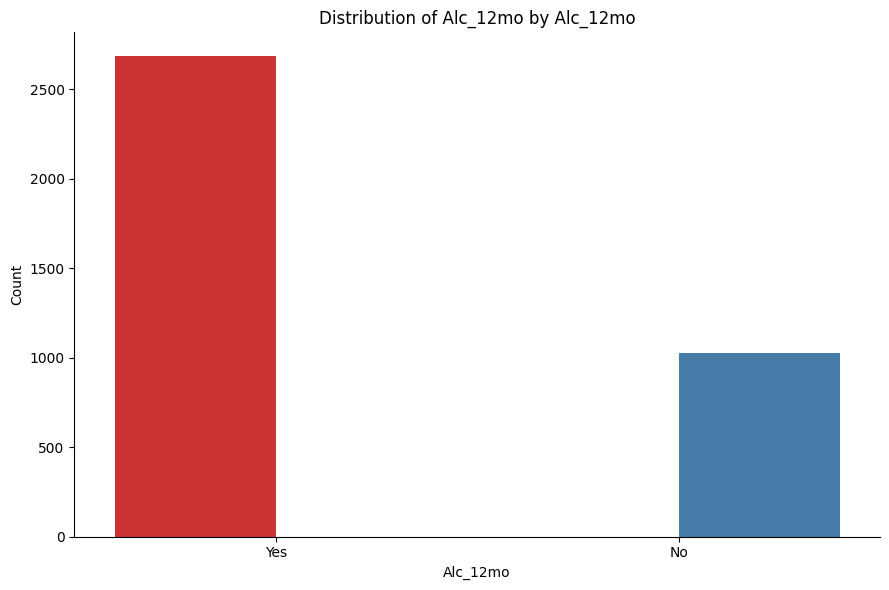

<Figure size 1000x1000 with 0 Axes>

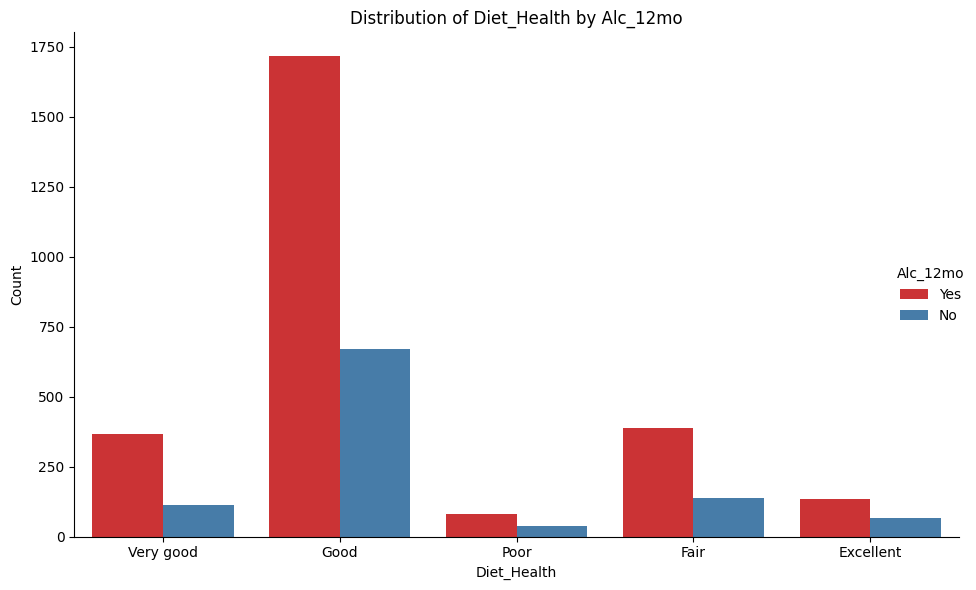

<Figure size 1000x1000 with 0 Axes>

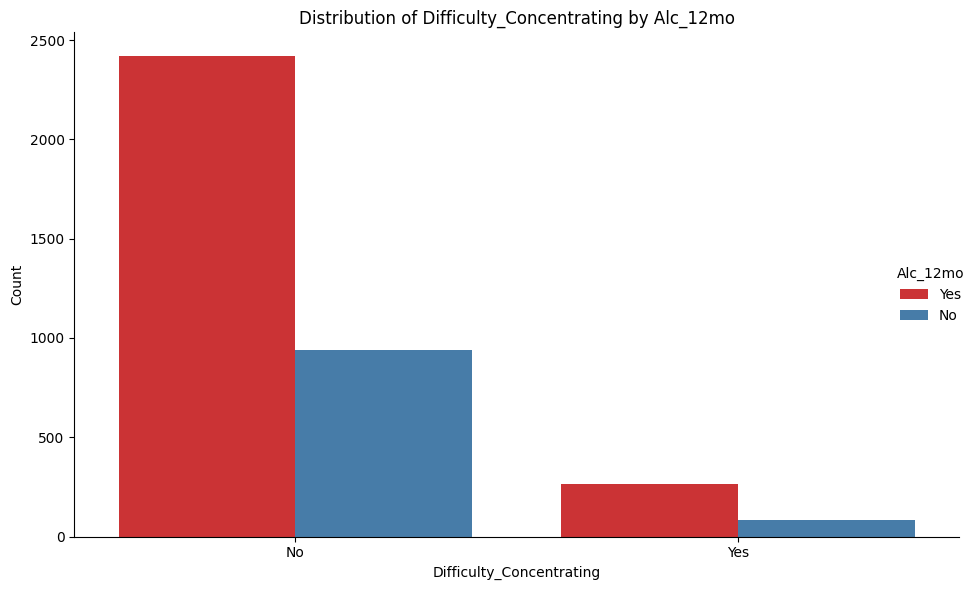

<Figure size 1000x1000 with 0 Axes>

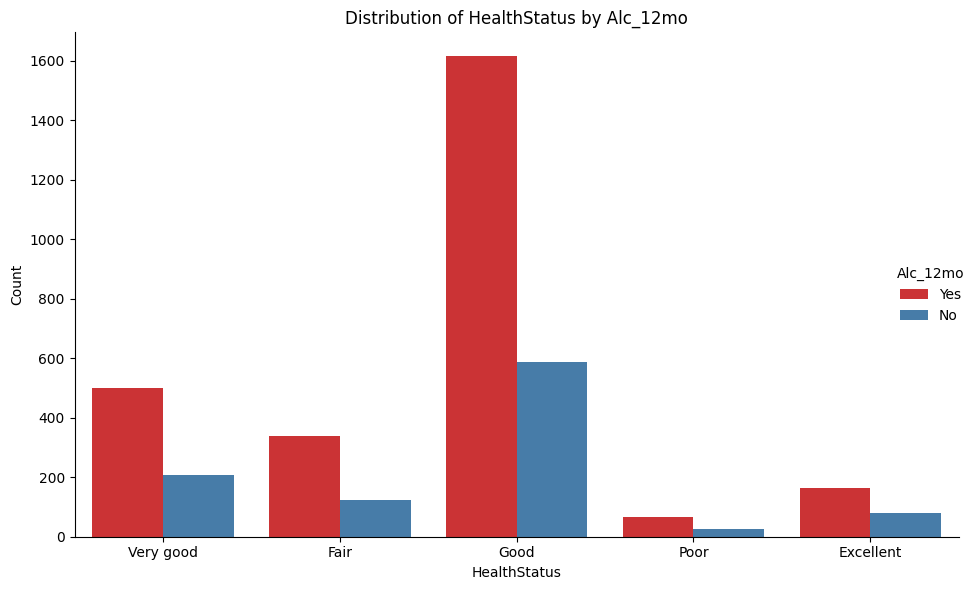

<Figure size 1000x1000 with 0 Axes>

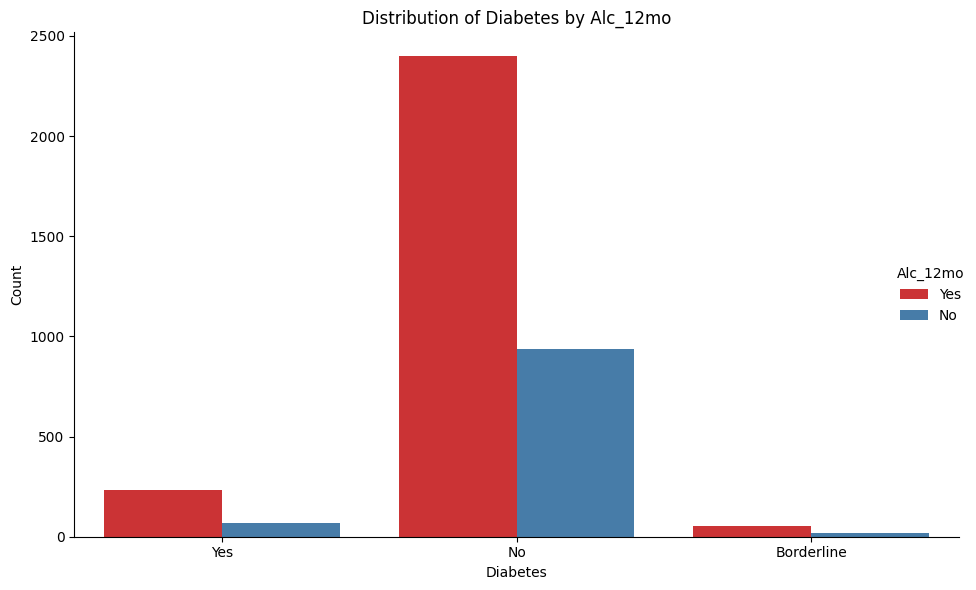

<Figure size 1000x1000 with 0 Axes>

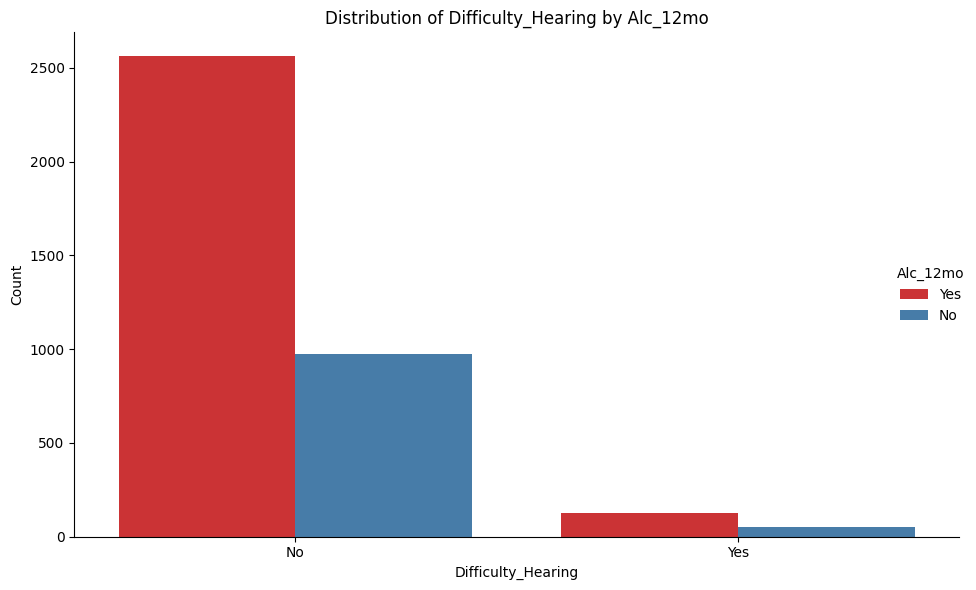

<Figure size 1000x1000 with 0 Axes>

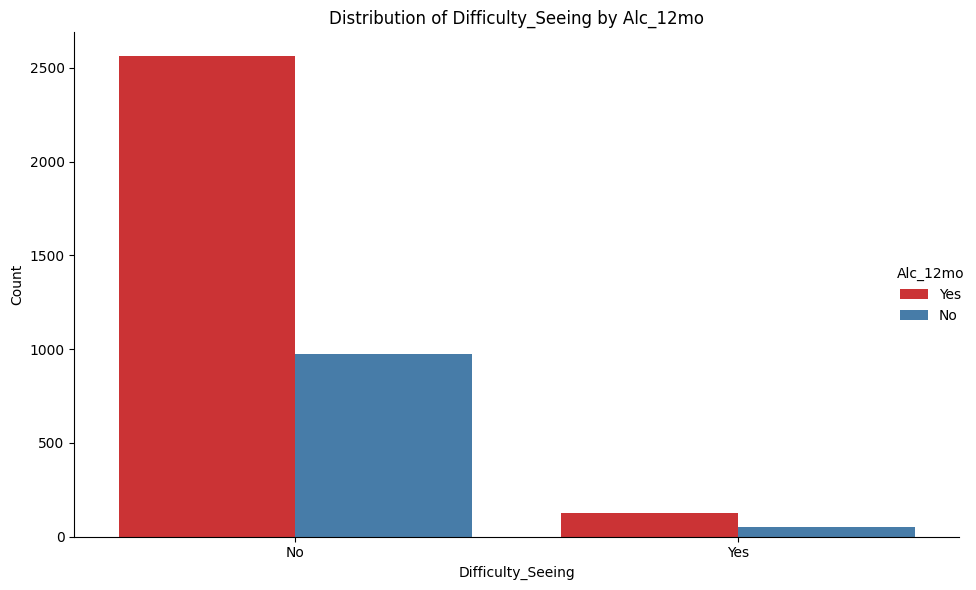

<Figure size 1000x1000 with 0 Axes>

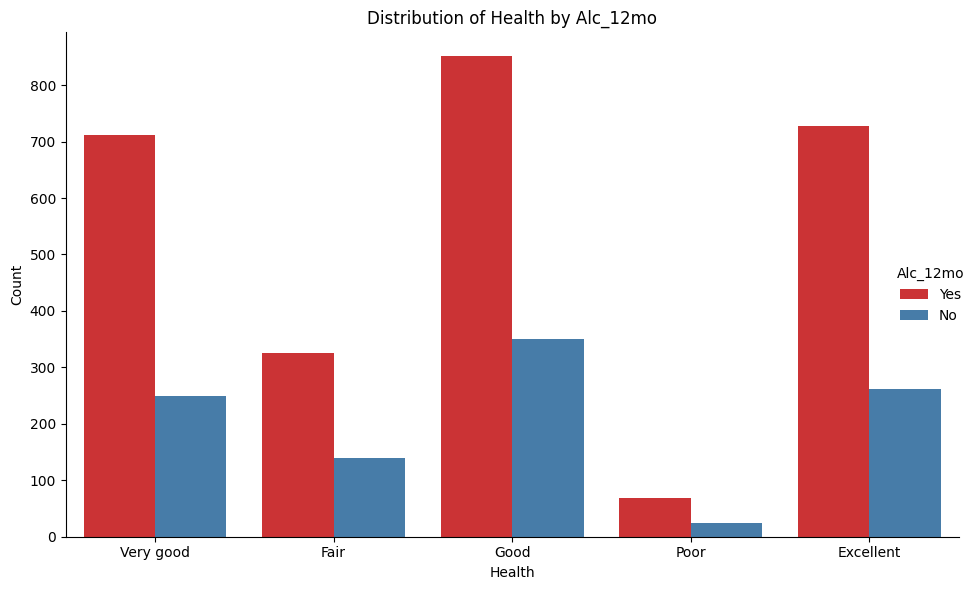

<Figure size 1000x1000 with 0 Axes>

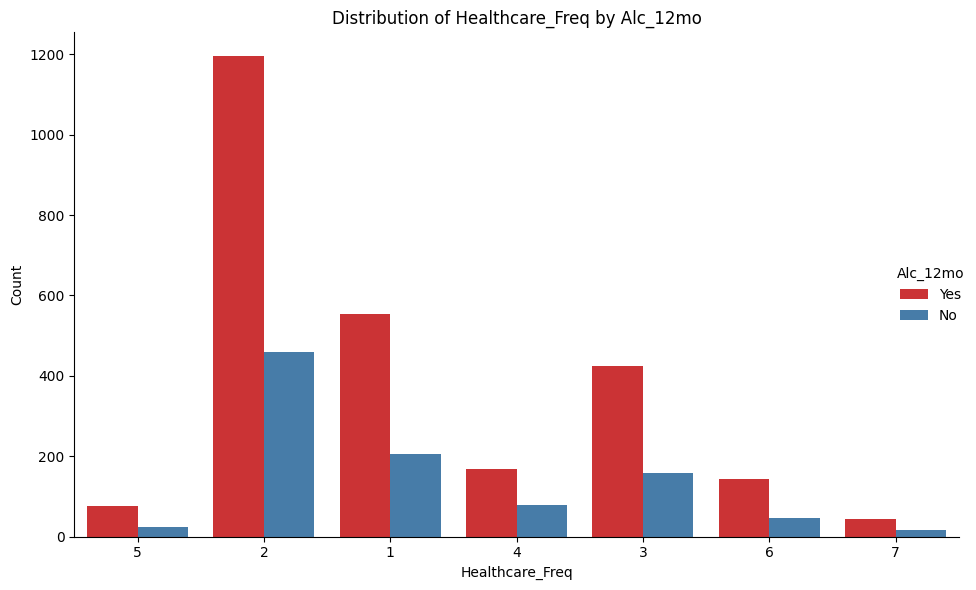

<Figure size 1000x1000 with 0 Axes>

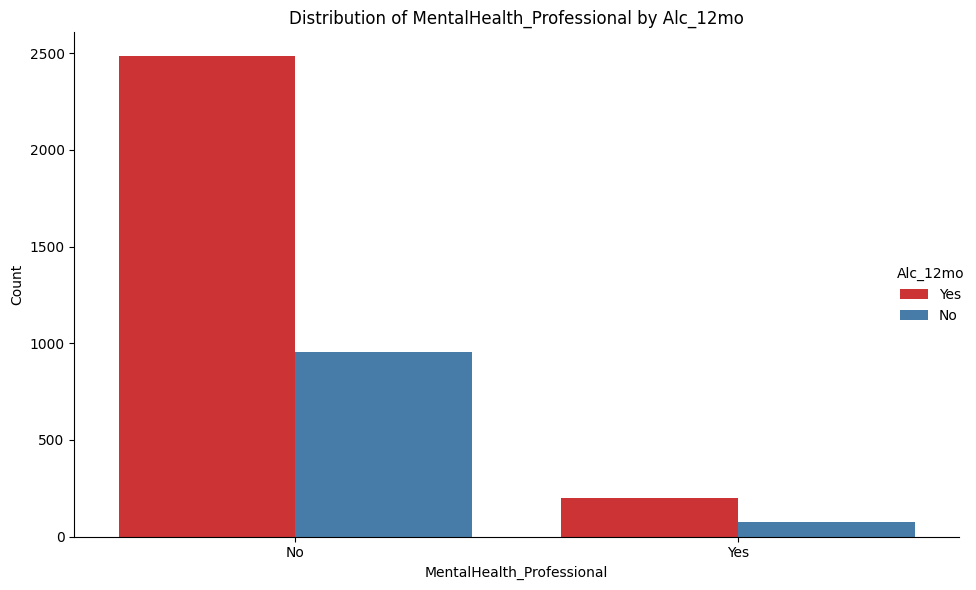

<Figure size 1000x1000 with 0 Axes>

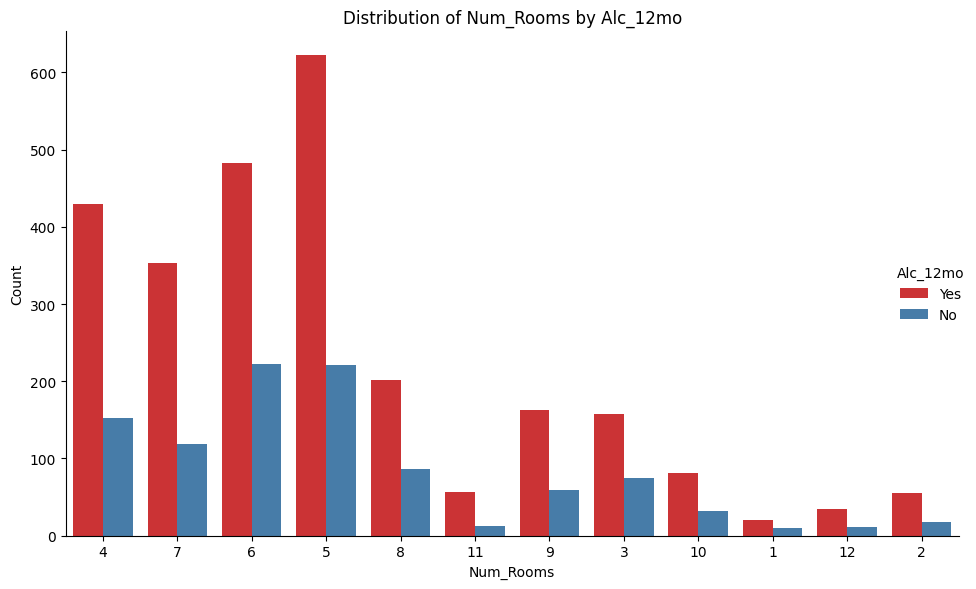

<Figure size 1000x1000 with 0 Axes>

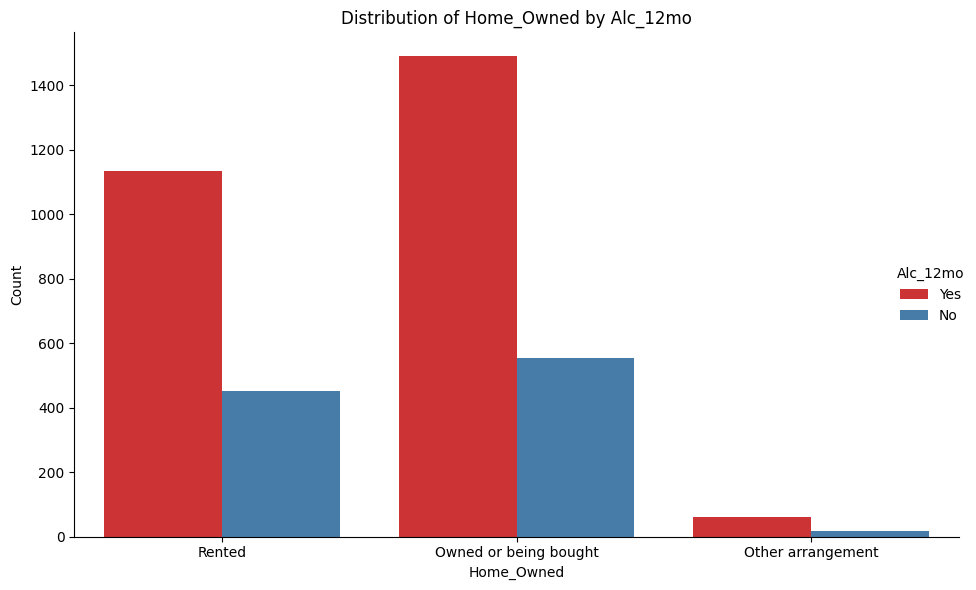

<Figure size 1000x1000 with 0 Axes>

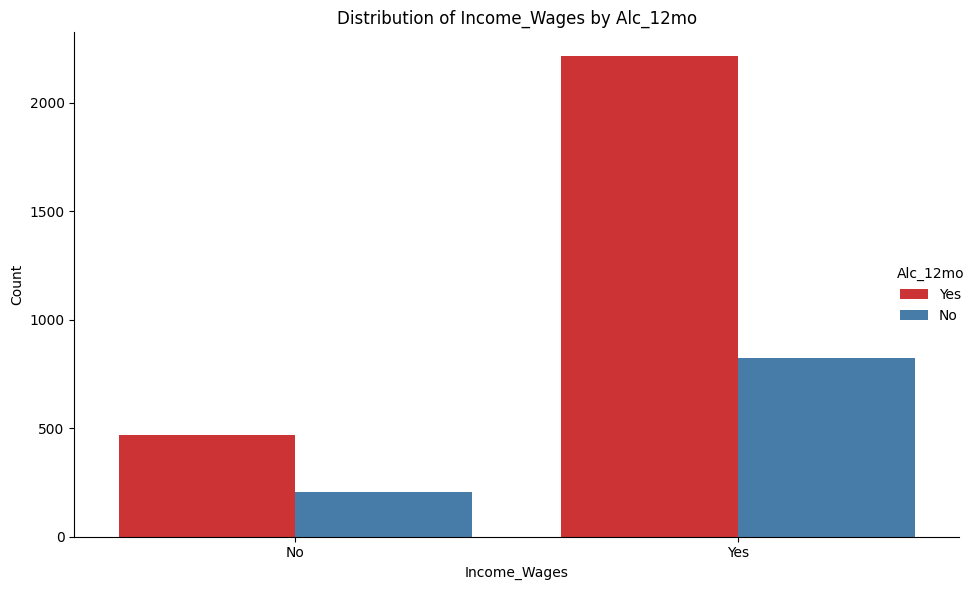

<Figure size 1000x1000 with 0 Axes>

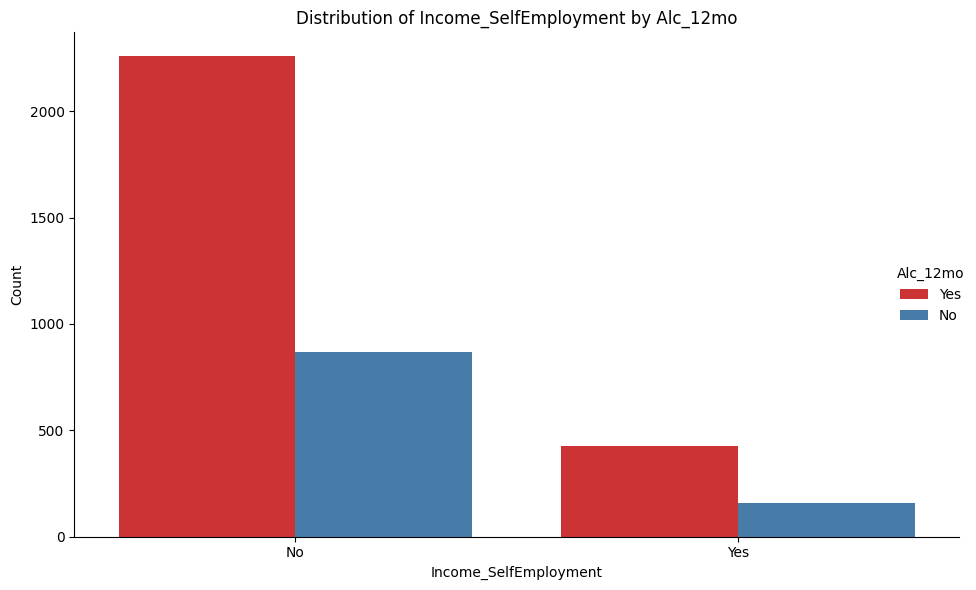

<Figure size 1000x1000 with 0 Axes>

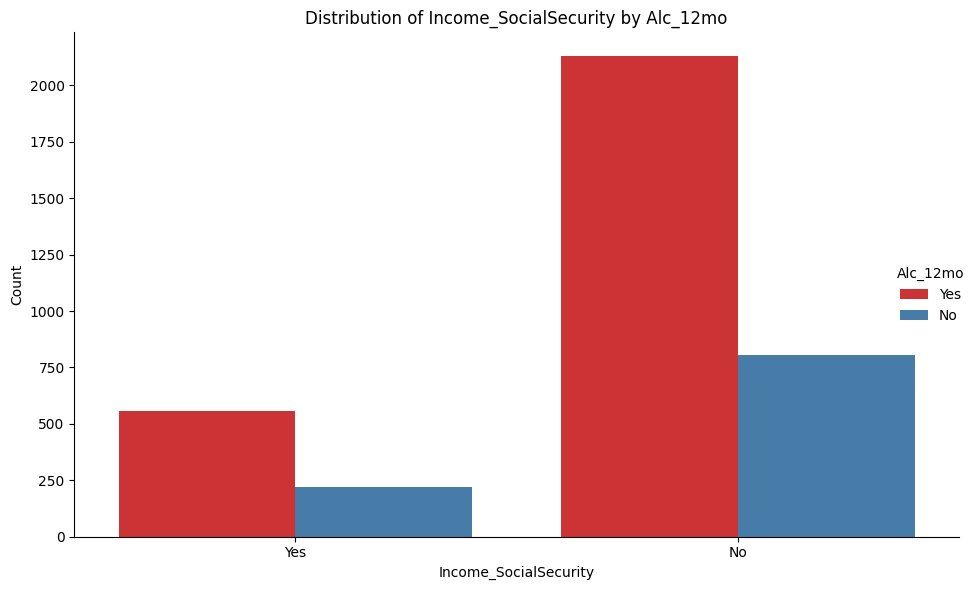

<Figure size 1000x1000 with 0 Axes>

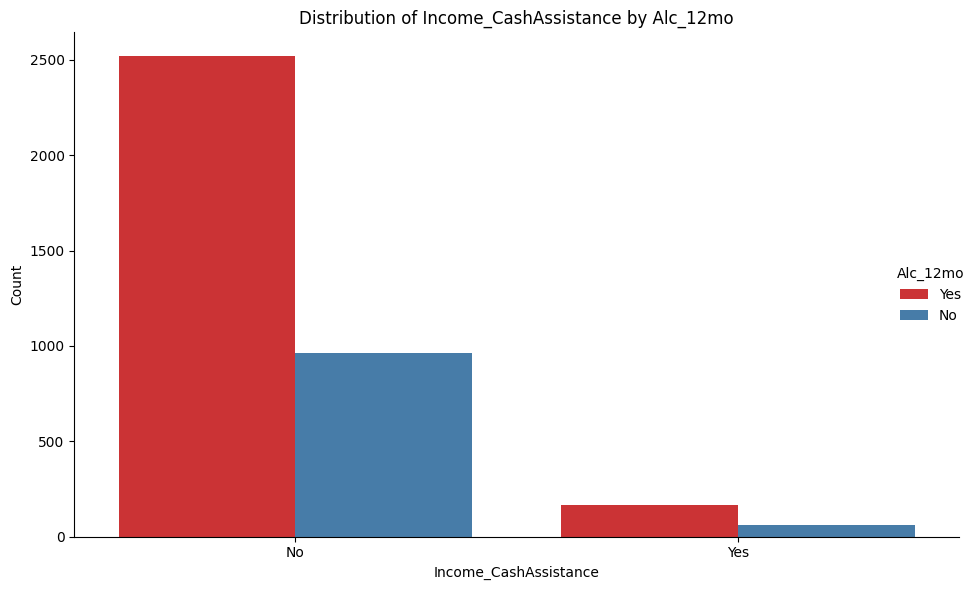

<Figure size 1000x1000 with 0 Axes>

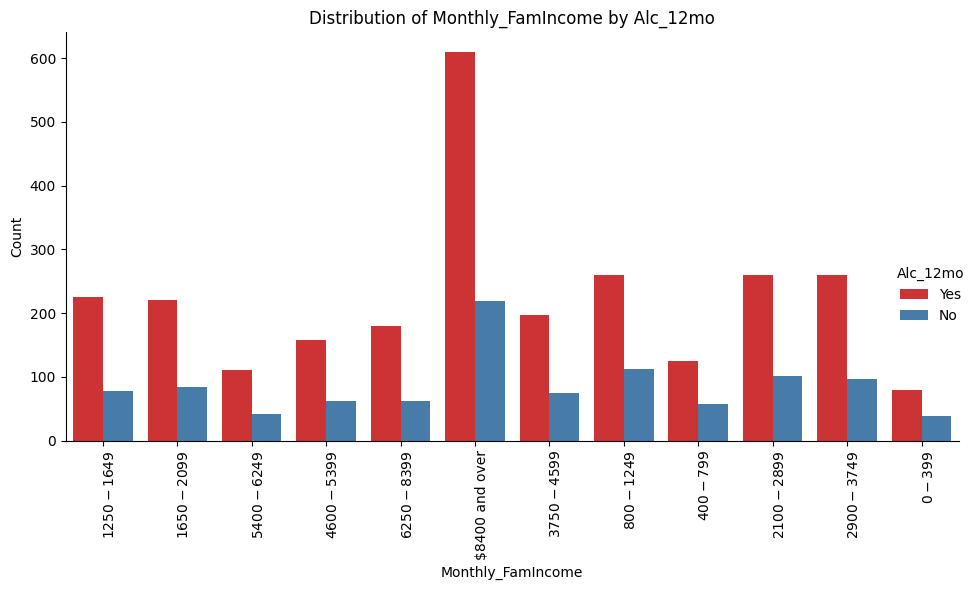

<Figure size 1000x1000 with 0 Axes>

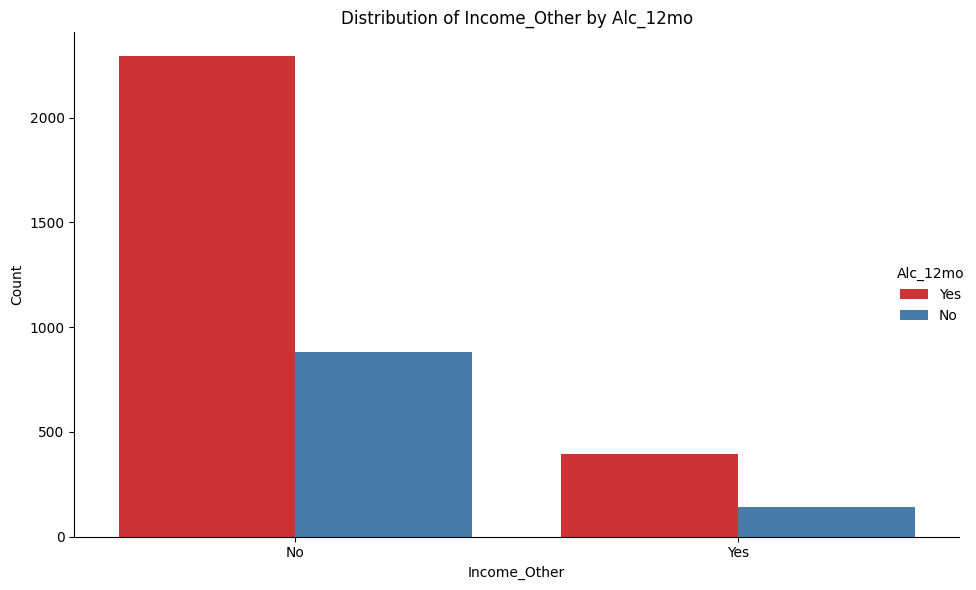

<Figure size 1000x1000 with 0 Axes>

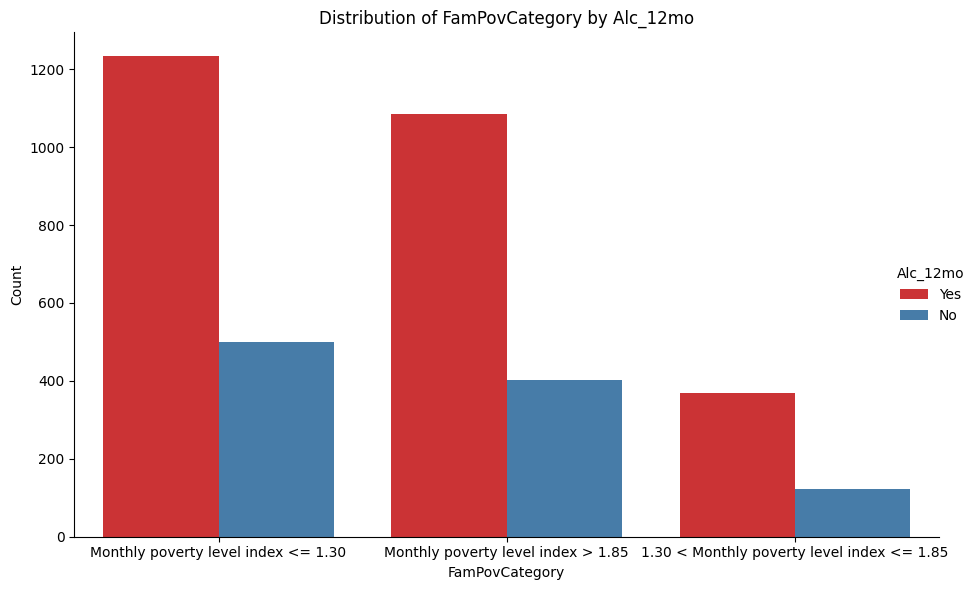

<Figure size 1000x1000 with 0 Axes>

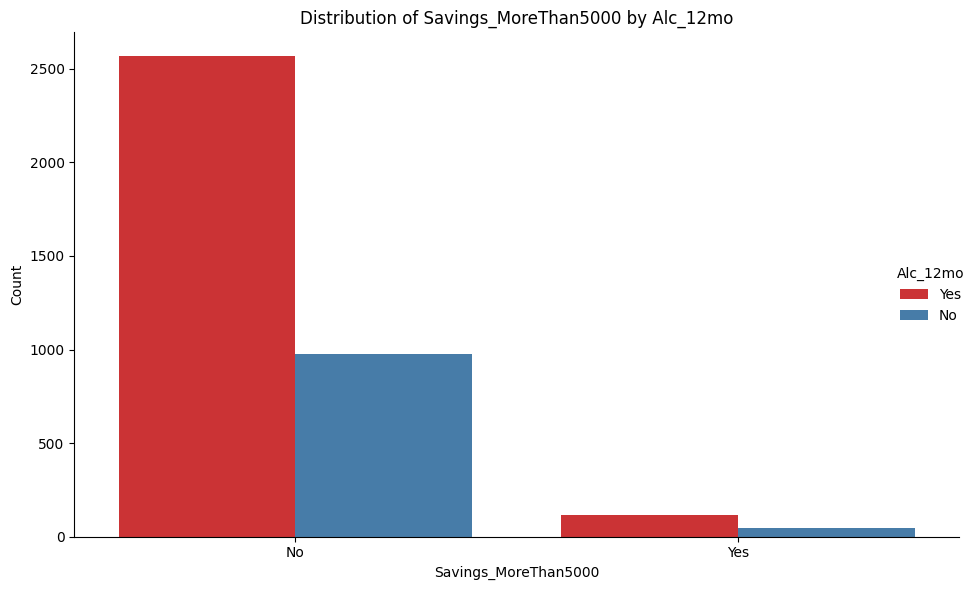

<Figure size 1000x1000 with 0 Axes>

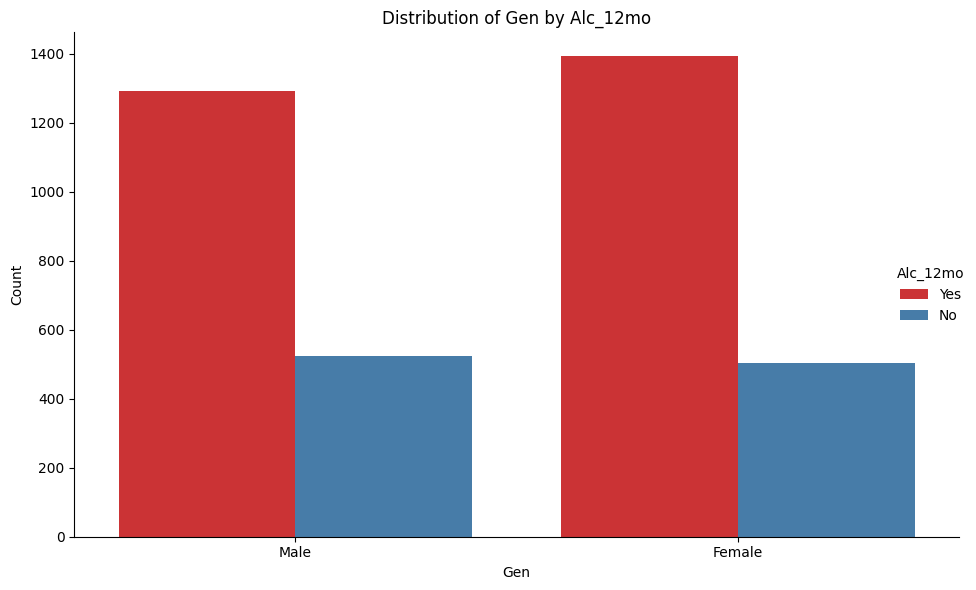

<Figure size 1000x1000 with 0 Axes>

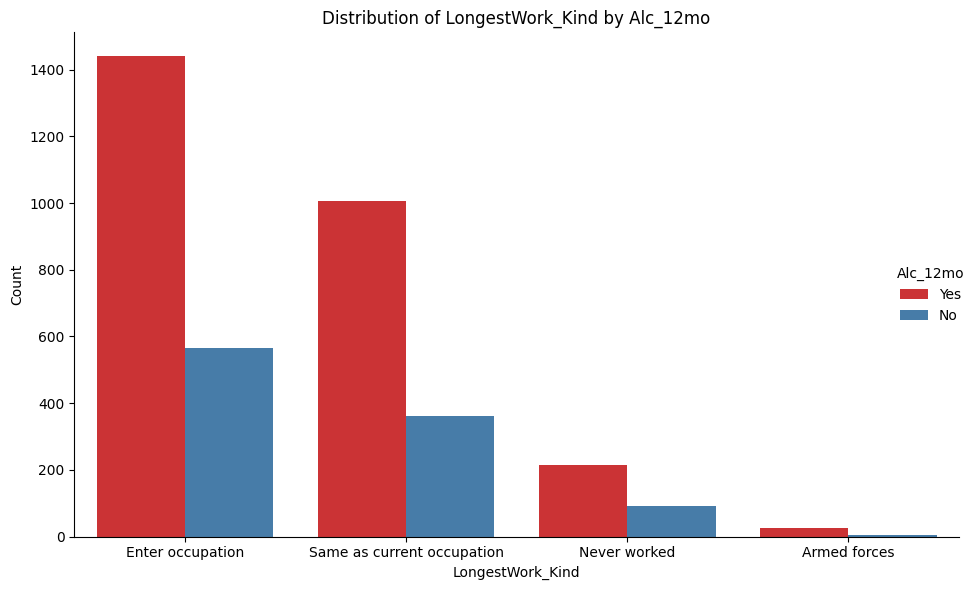

<Figure size 1000x1000 with 0 Axes>

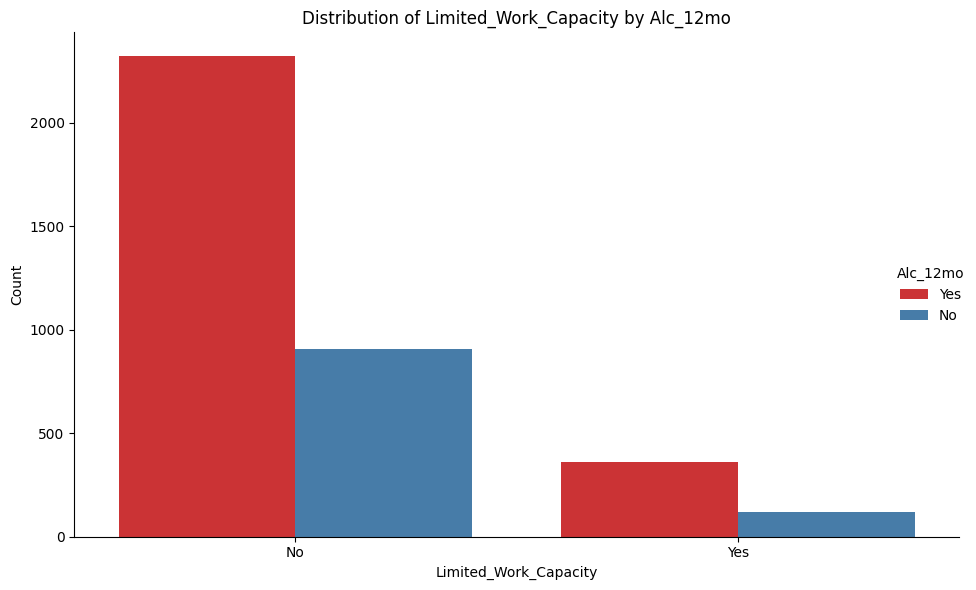

<Figure size 1000x1000 with 0 Axes>

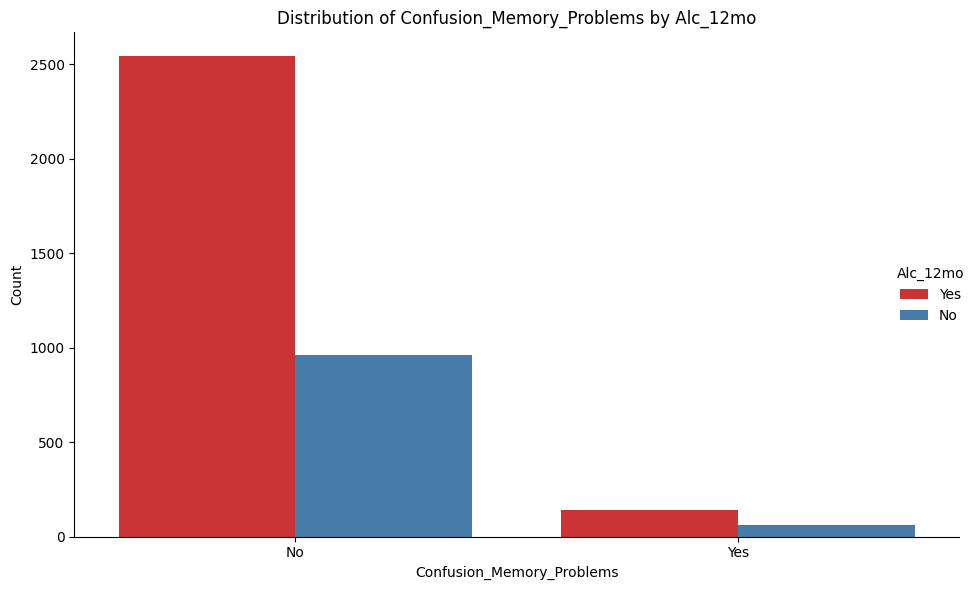

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# transformed_dataset = ...

# Categorical columns
categorical_columns = ['HighestEducationLevel', 'MaritalStatus', 'HHSiz', 'FamSiz', 'Child6_17', 'HHIncome', 'FamIncome',
                       'EatOccasion', 'FoodSource', 'EatAtHome', 'BPStatus', 'Alc_12mo', 'Diet_Health', 'Difficulty_Concentrating',
                       'HealthStatus', 'Diabetes', 'Difficulty_Hearing', 'Difficulty_Seeing', 'Health', 'Healthcare_Freq',
                       'Hospital_Overnight', 'MentalHealth_Professional', 'Num_Rooms', 'Home_Owned', 'Income_Wages',
                       'Income_SelfEmployment', 'Income_SocialSecurity', 'Income_CashAssistance', 'Monthly_FamIncome',
                       'Income_Other', 'FamPovCategory', 'Savings_MoreThan5000','Gen',
                       'Weak_Failing_Kidneys', 'LongestWork_Kind', 'Limited_Work_Capacity', 'Confusion_Memory_Problems', 'Sleep_Disorder']


for col in categorical_columns:
    if col in transformed_dataset.columns and transformed_dataset[col].nunique() > 0:
        plt.figure(figsize=(10, 10))


        if ((col == 'FoodSource') | (col == 'EatOccasion') | (col == 'FamIncome') | (col == 'HHIncome') | (col == 'HighestEducationLevel') | (col == 'Monthly_FamIncome')):
            g = sns.catplot(data=transformed_dataset, x=col, hue='Alc_12mo', kind='count', palette="Set1", height=6, aspect=1.5)
            g.set_axis_labels(col, 'Count')

            # Rotate x-axis labels and align vertically
            plt.xticks(rotation=90, ha='left')
            plt.subplots_adjust(bottom=0.3)  # Adjust the bottom margin to fit the labels
        else:
            g = sns.catplot(data=transformed_dataset, x=col, hue='Alc_12mo', kind='count', palette="Set1", height=6, aspect=1.5)
            g.set_axis_labels(col, 'Count')

        plt.title(f'Distribution of {col} by Alc_12mo')
        plt.tight_layout()
        plt.show()


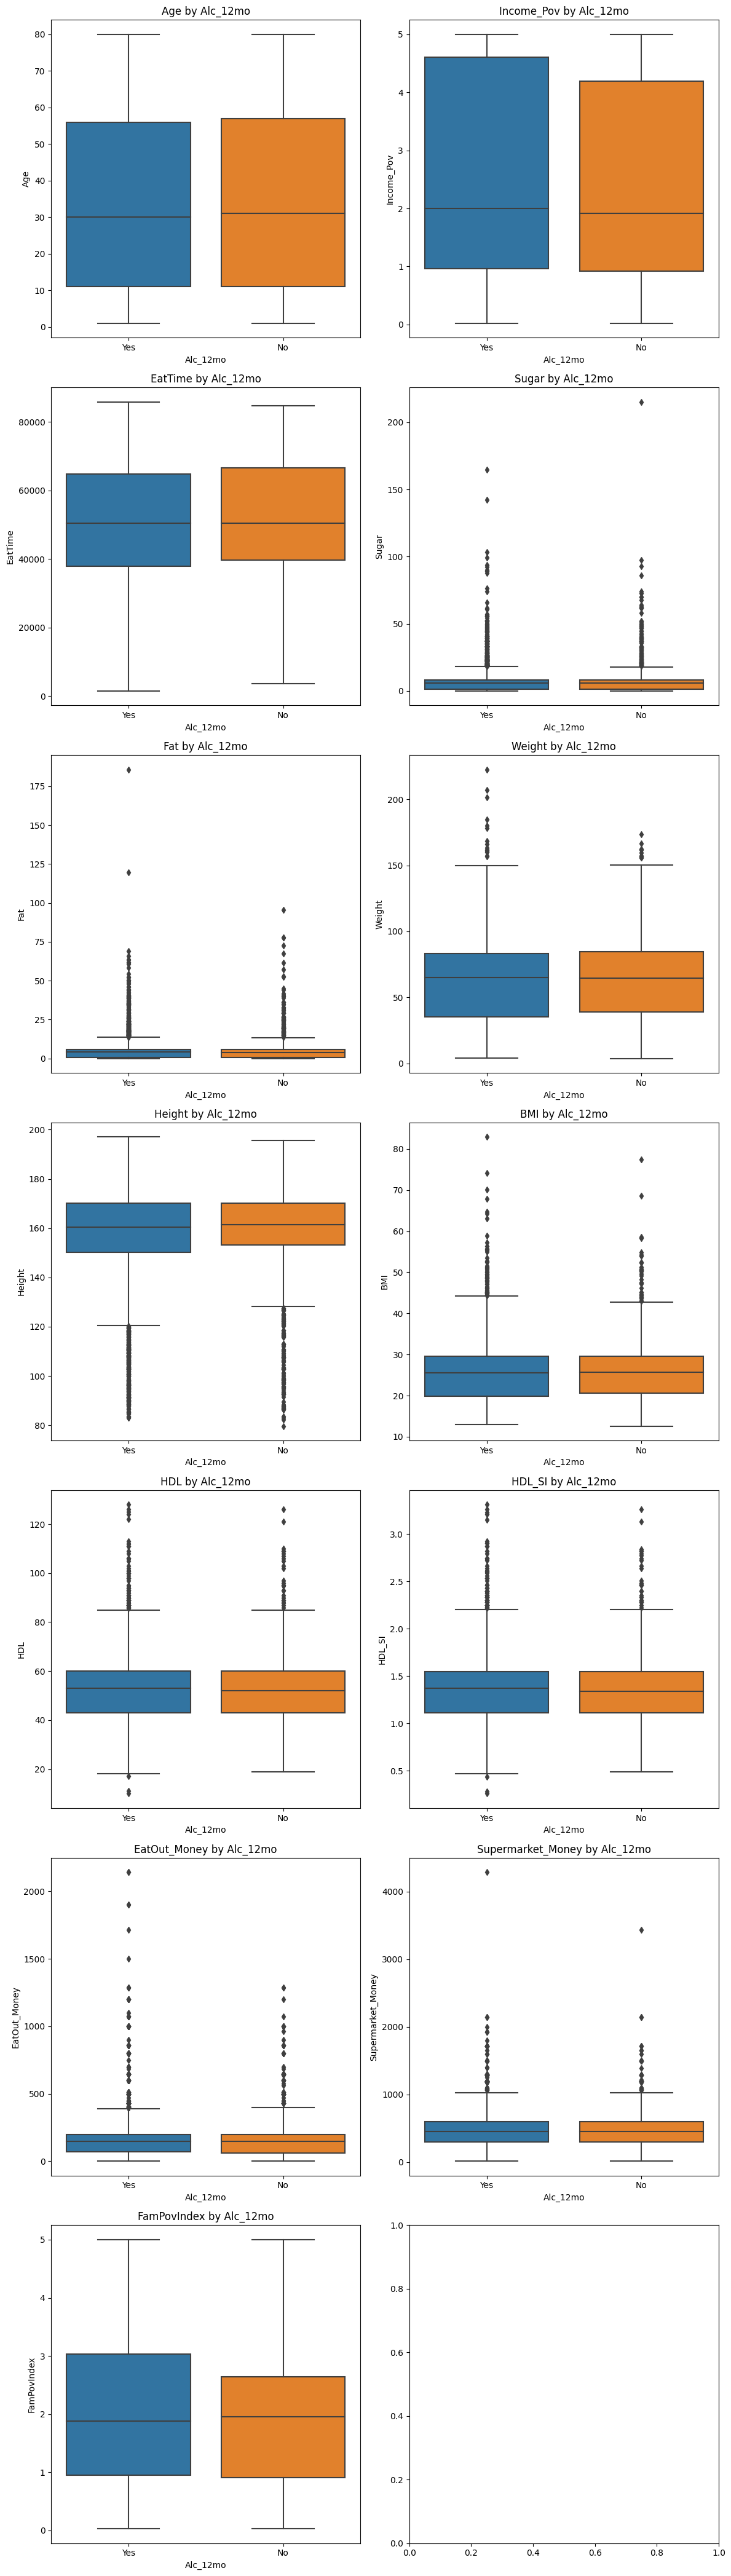

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# transformed_dataset = ...

# Categorical target variable
target_variable = 'Alc_12mo'

# Numerical columns
numerical_columns = ['Age', 'Income_Pov', 'EatTime', 'Sugar', 'Fat', 'Weight', 'Height', 'BMI',
                     'HDL', 'HDL_SI', 'EatOut_Money', 'Supermarket_Money', 'FamPovIndex']

# Create subplots
num_cols = len(numerical_columns)
rows = (num_cols + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(12, rows * 6))

for i, col in enumerate(numerical_columns):
    row = i // 2
    col_idx = i % 2
    ax = axes[row, col_idx]

    # Create a box plot
    sns.boxplot(data=transformed_dataset, x=target_variable, y=col, ax=ax)
    ax.set_title(f'{col} by {target_variable}')
    ax.set_xlabel(target_variable)
    ax.set_ylabel(col)

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Assuming transformed_dataset is your DataFrame
# categorical_columns contains the list of categorical column names

import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming transformed_dataset is your DataFrame
# categorical_columns contains the list of categorical column names

import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming transformed_dataset is your DataFrame
# categorical_columns contains the list of categorical column names

# Remove the target variable from the list of categorical columns
categorical_columns_uni.remove('Alc_12mo')  # Replace 'Alc_12mo' with your actual target variable name

# Create a new DataFrame to store the one-hot encoded columns
one_hot_encoded = pd.get_dummies(transformed_dataset[categorical_columns_uni], columns=categorical_columns_uni)

# Drop the original categorical columns from the original DataFrame
transformed_dataset.drop(columns=categorical_columns_uni, inplace=True)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
transformed_dataset = pd.concat([transformed_dataset, one_hot_encoded], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    transformed_dataset.drop(columns=['Alc_12mo']),
    transformed_dataset['Alc_12mo'],
    test_size=0.2,
    random_state=42
)

# Print the modified DataFrame
print(transformed_dataset)



               Age   Income_Pov          EatTime         Sugar           Fat  \
0    69.0000000000 0.8400000000 25200.0000000000  8.0300000000 11.0800000000   
1    54.0000000000 1.7800000000 25200.0000000000  7.9914558721  0.0700000000   
2    72.0000000000 4.5100000000 25200.0000000000  1.6100000000  5.8259777853   
3     9.0000000000 2.5200000000 25200.0000000000 37.3500000000  0.5400000000   
4    73.0000000000 5.0000000000 36000.0000000000 12.2500000000  0.1600000000   
...            ...          ...              ...           ...           ...   
3706 44.0000000000 5.0000000000 55800.0000000000  0.0200000000  1.5600000000   
3707 15.0000000000 2.1500000000 55800.0000000000  4.4900000000  0.0600000000   
3708 41.0000000000 4.0700000000 57600.0000000000  7.9914558721  5.8259777853   
3709  4.0000000000 4.4000000000 61200.0000000000  0.3400000000  0.5700000000   
3710 17.0000000000 5.0000000000 61200.0000000000 22.8200000000  0.2500000000   

            Weight         Height      

In [ ]:
# Check if there are any null values in the DataFrame
has_null_values = transformed_dataset.isnull().any()

# Print the columns with null values
print(has_null_values)


Age                 False
Income_Pov          False
EatTime             False
Sugar               False
Fat                 False
                    ...  
Sleep_Hours_6.0     False
Sleep_Hours_8.0     False
Sleep_Hours_10.0    False
Sleep_Hours_11.0    False
Sleep_Hours_12.0    False
Length: 314, dtype: bool


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

transformed_dataset[numerical_columns_uni] = scaler.fit_transform(transformed_dataset[numerical_columns_uni])


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.702557200538358
Classification Report:
               precision    recall  f1-score   support

          No       0.00      0.00      0.00       219
         Yes       0.70      1.00      0.83       524

    accuracy                           0.70       743
   macro avg       0.35      0.50      0.41       743
weighted avg       0.50      0.70      0.58       743

Confusion Matrix:
 [[  0 219]
 [  2 522]]
Height: 0.0357
Sugar: 0.0349
BMI: 0.0344
Weight: 0.0325
Fat: 0.0301
HDL: 0.0297
Supermarket_Money: 0.0288
HDL_SI: 0.0283
Age: 0.0283
EatTime: 0.0273
Mother_AgeBirth: 0.0270
Income_Pov: 0.0261
FamPovIndex: 0.0260
EatOut_Money: 0.0248
LongestJob_Duration: 0.0215
Work_Hours_LastWeek: 0.0154
 HHSiz: 0.0121
 FamSiz: 0.0116
Gen_Male: 0.0064
HealthStatus_Good: 0.0061


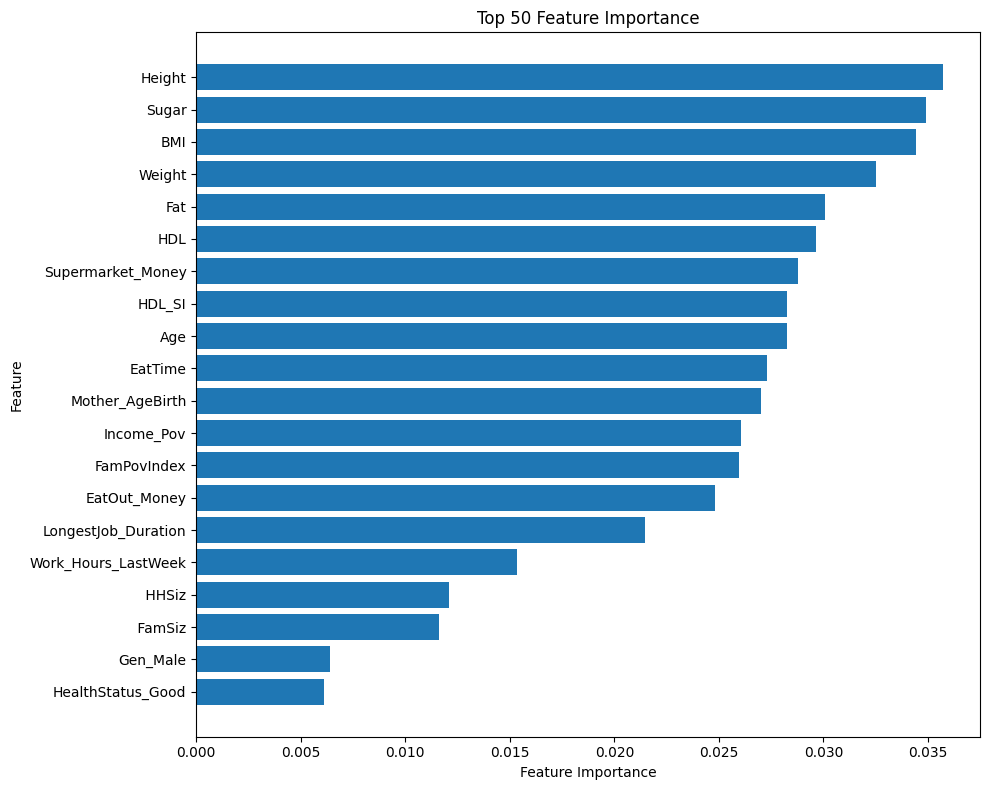

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load your dataset and perform necessary preprocessing
# Assuming transformed_dataset is your DataFrame
# Convert 'Alc_12mo' to string type
transformed_dataset['Alc_12mo'] = transformed_dataset['Alc_12mo'].astype('category')
# Replace missing values with 0 using SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    transformed_dataset.drop(columns=['Alc_12mo']),
    transformed_dataset['Alc_12mo'],
    test_size=0.2,
    random_state=42
)


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_imputed, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize the Random Forest model with the best hyperparameters
best_rf = RandomForestClassifier(**best_params)

# Fit the model using the target variable
best_rf.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred = best_rf.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)


# Get the feature importances
feature_importances = best_rf.feature_importances_
# Get the feature names from the DataFrame
feature_names = transformed_dataset.drop(columns=['Alc_12mo']).columns
# Create a dictionary to store feature names and importances
feature_importance_dict = {feature: importance for feature, importance in zip(feature_names, feature_importances)}

# Print the top 20 features and their importances
top_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)[:20]
for feature, importance in top_feature_importances:
    print(f"{feature}: {importance:.4f}")

# Create a bar plot of top 20 feature importances with rotated labels
top_feature_names = [feature[0] for feature in top_feature_importances]
top_importances = [feature[1] for feature in top_feature_importances]

plt.figure(figsize=(10, 8))
plt.barh(top_feature_names, top_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 50 Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have features at the top
plt.tight_layout()
plt.show()



In [ ]:
# ... (your previous code)

# Get probability scores for both classes
y_proba = best_rf.predict_proba(X_test_imputed)




In [ ]:
# Assuming y_proba is the array containing probability scores
# The second column contains the probability scores for the "Yes" class
y_proba_yes = y_proba[:, 1]
# Calculate probability scores for the "No" class
y_proba_no = 1 - y_proba_yes


Height: 0.0357
Sugar: 0.0349
BMI: 0.0344
Weight: 0.0325
Fat: 0.0301
HDL: 0.0297
Supermarket_Money: 0.0288
HDL_SI: 0.0283
Age: 0.0283
EatTime: 0.0273
Mother_AgeBirth: 0.0270
Income_Pov: 0.0261
FamPovIndex: 0.0260
EatOut_Money: 0.0248
LongestJob_Duration: 0.0215
Work_Hours_LastWeek: 0.0154
 HHSiz: 0.0121
 FamSiz: 0.0116
Gen_Male: 0.0064
HealthStatus_Good: 0.0061
Marijuana_2.0: 0.0061
LongestWork_Kind_Enter occupation: 0.0060
FoodSource_Store - grocery/supermarket: 0.0060
Gen_Female: 0.0060
Sleep_Hours_8.0: 0.0057
Healthcare_Freq_2: 0.0057
EatAtHome_Yes: 0.0055
Num_Rooms_6: 0.0055
Health_Good: 0.0053
Home_Owned_Rented: 0.0053
Diet_Health_Good: 0.0053
Occupation_Code_CurrentJob_13.095238095238095: 0.0053
MaritalStatus_Married: 0.0051
Sleep_Hours_6.0: 0.0051
Occupation_Code_LongestJob_17.0: 0.0050
Health_Excellent: 0.0050
Industry_Code_LongestJob_16.0: 0.0049
HealthStatus_Very good: 0.0049
Home_Owned_Owned or being bought: 0.0049
Num_Rooms_5: 0.0049
Health_Very good: 0.0049
HHSiz_4.0: 0.004

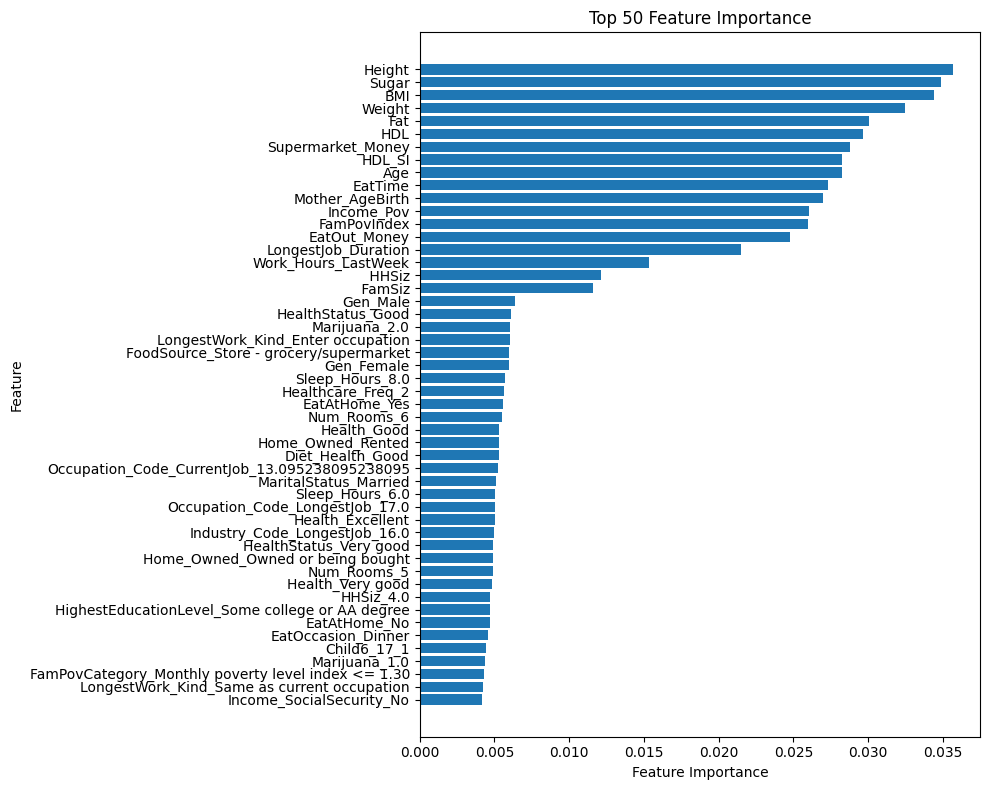

In [ ]:
# Get the feature importances
feature_importances = best_rf.feature_importances_
# Get the feature names from the DataFrame
feature_names = transformed_dataset.drop(columns=['Alc_12mo']).columns
# Create a dictionary to store feature names and importances
feature_importance_dict = {feature: importance for feature, importance in zip(feature_names, feature_importances)}

# Print the top 20 features and their importances
top_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)[:50]
for feature, importance in top_feature_importances:
    print(f"{feature}: {importance:.4f}")

# Create a bar plot of top 20 feature importances with rotated labels
top_feature_names = [feature[0] for feature in top_feature_importances]
top_importances = [feature[1] for feature in top_feature_importances]

plt.figure(figsize=(10, 8))
plt.barh(top_feature_names, top_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 50 Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have features at the top
plt.tight_layout()
plt.show()


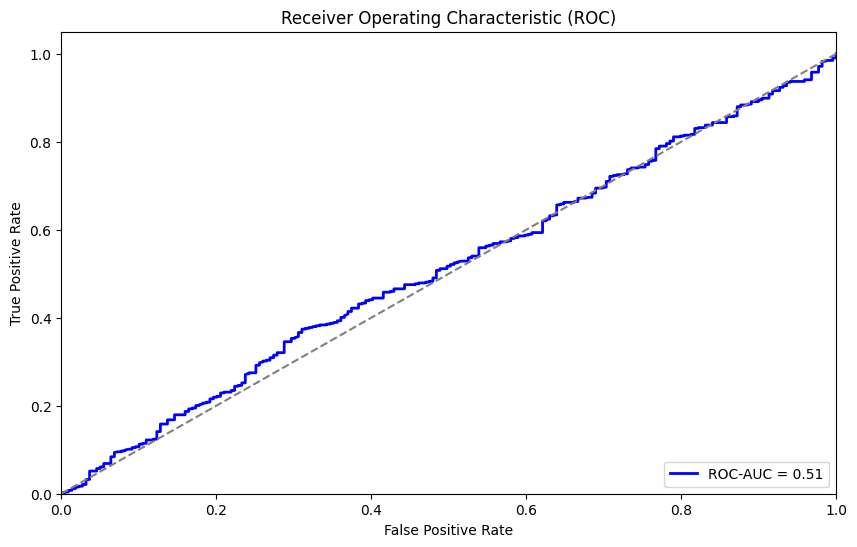

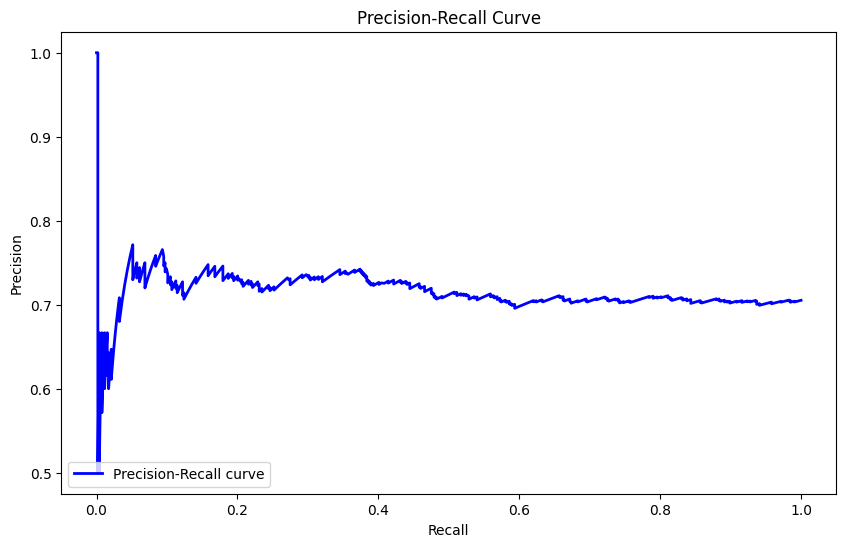

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

# Calculate predicted probabilities for positive class (class 1)
y_pred_prob = best_rf.predict_proba(X_test_imputed)[:, 1]
y_test_binary = y_test.map({'No': 0, 'Yes': 1})
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test_binary, y_pred_prob)

# Calculate precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_binary, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC-AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [ ]:


from sklearn.model_selection import cross_val_score

# Assuming best_logreg is the best LogisticRegression model you've trained
# X_train_scaled and y_train are your training data

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_rf, X_train_imputed, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean CV Score:", mean_cv_score)
print("Standard Deviation of CV Scores:", std_cv_score)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Cross-Validation Scores: [0.72727273 0.72727273 0.72727273 0.7301855  0.7301855 ]
Mean CV Score: 0.7284378353518319
Standard Deviation of CV Scores: 0.0014269601445003651


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
transformed_dataset['Alc_12mo'] = transformed_dataset['Alc_12mo'].astype('category')
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    transformed_dataset.drop(columns=['Alc_12mo']),
    transformed_dataset['Alc_12mo'],
    test_size=0.2,
    random_state=42
)

# Replace missing values with 0 using SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 1.0],  # Step size for updates
    'max_depth': [3, 4, 5]  # Maximum depth of individual trees
}

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model with the best hyperparameters
grid_search.fit(X_train_imputed, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the testing set using the best model
y_pred = best_model.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy with Best Model:", accuracy)


# Generate classification report and confusion matrix
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)




Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
Accuracy with Best Model: 0.6998654104979811
Classification Report:
               precision    recall  f1-score   support

          No       0.00      0.00      0.00       219
         Yes       0.70      0.99      0.82       524

    accuracy                           0.70       743
   macro avg       0.35      0.50      0.41       743
weighted avg       0.50      0.70      0.58       743

Confusion Matrix:
 [[  0 219]
 [  4 520]]


Weight: 0.1305
Sugar: 0.1112
Height: 0.0660
BMI: 0.0644
Supermarket_Money: 0.0507
Income_Pov: 0.0470
EatOut_Money: 0.0454
Mother_AgeBirth: 0.0411
FamIncome_Under $20,000: 0.0298
FamPovIndex: 0.0272
Sleep_Hours_4.0: 0.0241
Work_Hours_LastWeek: 0.0232
HDL_SI: 0.0210
FamPovCategory_1.30 < Monthly poverty level index <= 1.85: 0.0193
HDL: 0.0154
FoodSource_Restaurant fast food/pizza: 0.0139
Health_Fair: 0.0129
Occupation_Code_LongestJob_6.0: 0.0109
Fat: 0.0102
EatOccasion_Extended consumption: 0.0086


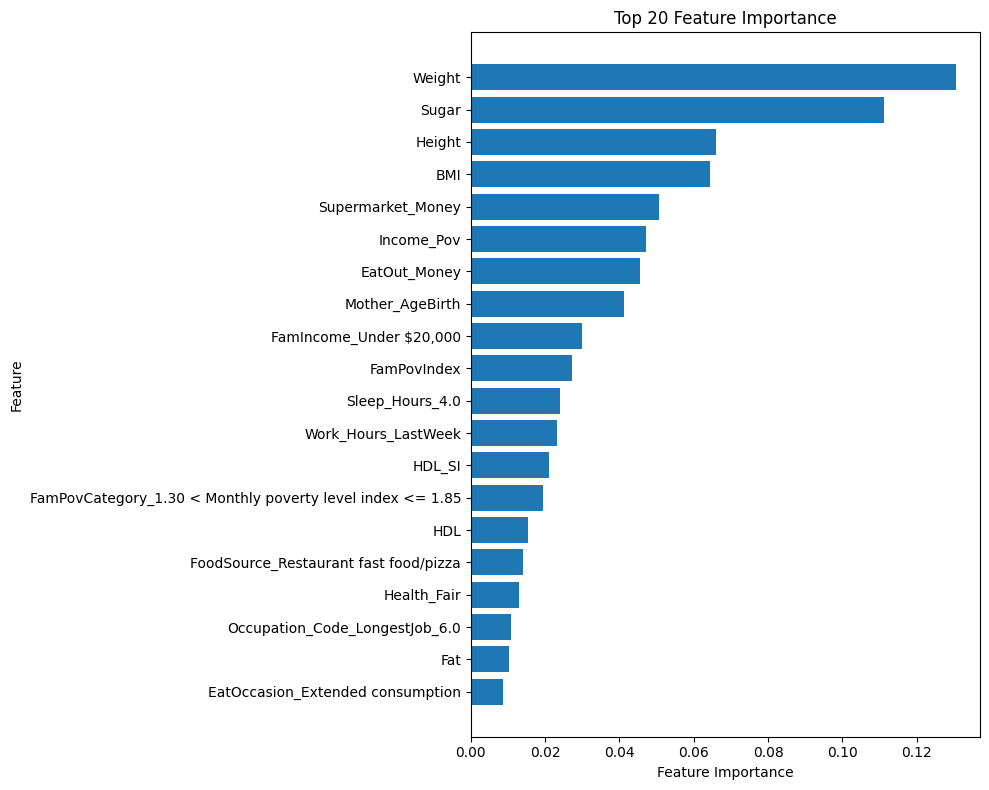

In [ ]:
# Get the feature importances
feature_importances = best_model.feature_importances_
feature_names = transformed_dataset.drop(columns=['Alc_12mo']).columns
# Create a dictionary to store feature names and importances
feature_importance_dict = {feature: importance for feature, importance in zip(feature_names, feature_importances)}

# Print the top 20 features and their importances
top_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)[:20]
for feature, importance in top_feature_importances:
    print(f"{feature}: {importance:.4f}")

# Create a bar plot of top 20 feature importances with rotated labels
top_feature_names = [feature[0] for feature in top_feature_importances]
top_importances = [feature[1] for feature in top_feature_importances]

plt.figure(figsize=(10, 8))
plt.barh(top_feature_names, top_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have features at the top
plt.tight_layout()
plt.show()

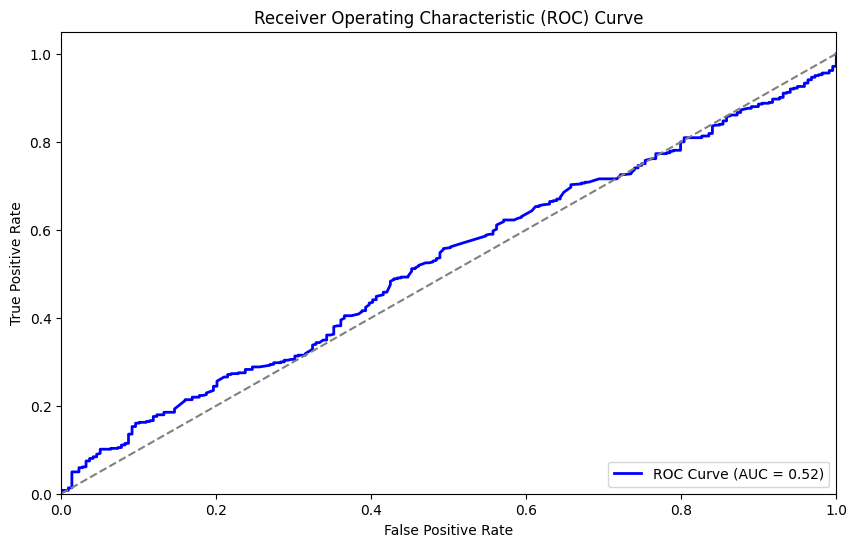

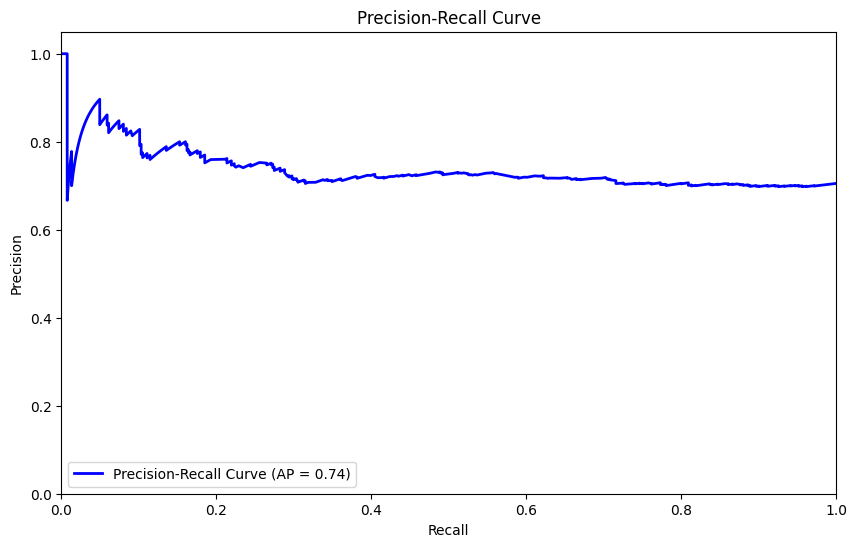

In [ ]:
# Import necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
y_test_binary = y_test.map({'No': 0, 'Yes': 1})


# Predict probabilities for positive class
y_pred_prob = best_model.predict_proba(X_test_imputed)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test_binary, y_pred_prob)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_binary, y_pred_prob)

# Calculate precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_binary, y_pred_prob)

# Calculate average precision score
avg_precision = average_precision_score(y_test_binary, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall Curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()


In [ ]:


from sklearn.model_selection import cross_val_score

# Assuming best_logreg is the best LogisticRegression model you've trained
# X_train_scaled and y_train are your training data

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_model, X_train_imputed, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean CV Score:", mean_cv_score)
print("Standard Deviation of CV Scores:", std_cv_score)


Cross-Validation Scores: [0.72895623 0.72558923 0.72558923 0.72175379 0.72681282]
Mean CV Score: 0.7257402581179984
Standard Deviation of CV Scores: 0.002342236748793923


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset and perform necessary preprocessing
# Assuming transformed_dataset is your DataFrame
# Convert 'Alc_12mo' to string type
transformed_dataset['Alc_12mo'] = transformed_dataset['Alc_12mo'].astype('category')
transformed_dataset['Alc_12mo'] = transformed_dataset['Alc_12mo'].astype('category')
# Replace missing values with 0 using SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    transformed_dataset.drop(columns=['Alc_12mo']),
    transformed_dataset['Alc_12mo'],
    test_size=0.2,
    random_state=42
)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_imputed, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize the Decision Tree model with the best hyperparameters
best_decision_tree = DecisionTreeClassifier(**best_params)

# Fit the model using the training data
best_decision_tree.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred = best_decision_tree.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.6716016150740243
Classification Report:
               precision    recall  f1-score   support

          No       0.34      0.12      0.18       219
         Yes       0.71      0.90      0.79       524

    accuracy                           0.67       743
   macro avg       0.53      0.51      0.49       743
weighted avg       0.60      0.67      0.61       743

Confusion Matrix:
 [[ 27 192]
 [ 52 472]]


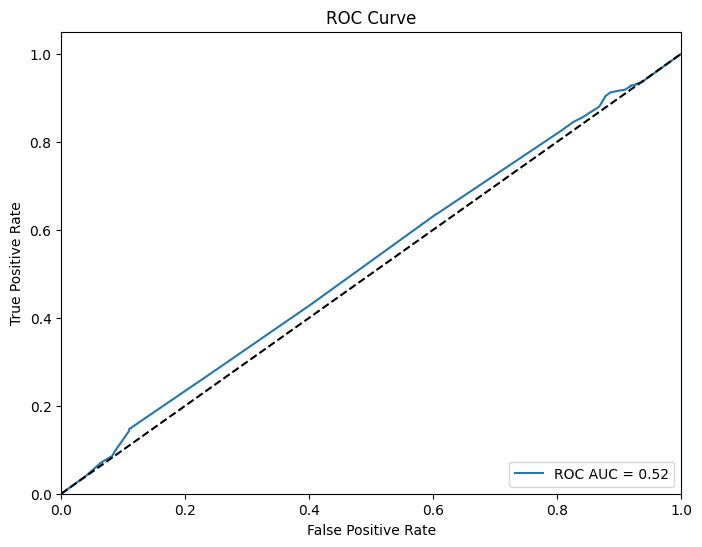

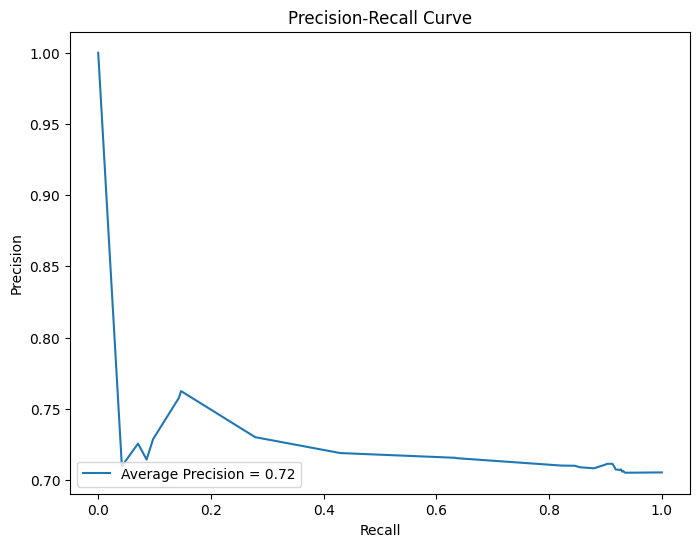

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Predict probabilities for positive class
y_pred_prob = best_decision_tree.predict_proba(X_test_imputed)[:, 1]
y_test_binary = y_test.map({'No': 0, 'Yes': 1})
# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test_binary, y_pred_prob)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_binary, y_pred_prob)

# Calculate precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_binary, y_pred_prob)
average_precision = average_precision_score(y_test_binary, y_pred_prob)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Average Precision = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


Height: 0.0840
Sugar: 0.0688
Fat: 0.0559
Supermarket_Money: 0.0490
Age: 0.0488
BMI: 0.0487
Weight: 0.0480
Mother_AgeBirth: 0.0396
EatTime: 0.0380
Income_Pov: 0.0374
HDL: 0.0300
LongestJob_Duration: 0.0263
FamSiz_4.0: 0.0202
Sleep_Hours_4.0: 0.0183
 FamSiz: 0.0182
Num_Rooms_7: 0.0180
FamIncome_Under $20,000: 0.0178
Industry_Code_LongestJob_15.0: 0.0176
 HHSiz: 0.0167
Diabetes_Yes: 0.0154


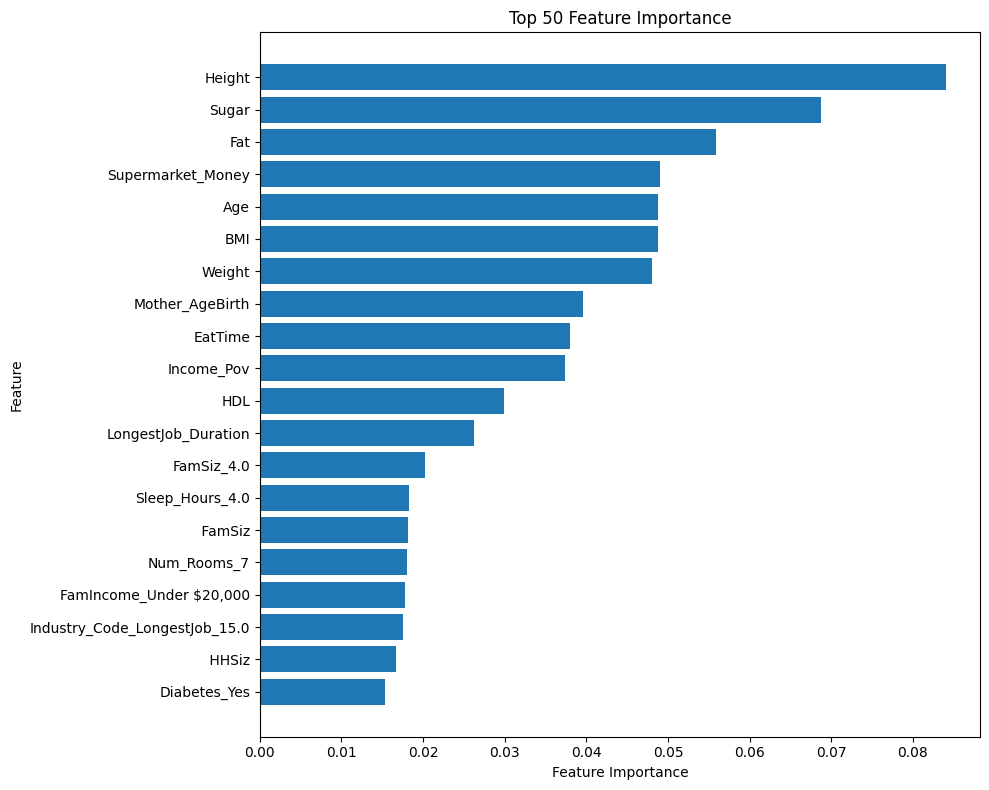

In [ ]:

# Get the feature importances
feature_importances = best_decision_tree.feature_importances_

# Create a dictionary to store feature names and importances
feature_importance_dict = {feature: importance for feature, importance in zip(feature_names, feature_importances)}

# Print the top 20 features and their importances
top_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)[:20]
for feature, importance in top_feature_importances:
    print(f"{feature}: {importance:.4f}")

# Create a bar plot of top 20 feature importances with rotated labels
top_feature_names = [feature[0] for feature in top_feature_importances]
top_importances = [feature[1] for feature in top_feature_importances]

plt.figure(figsize=(10, 8))
plt.barh(top_feature_names, top_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 50 Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have features at the top
plt.tight_layout()
plt.show()


In [ ]:


from sklearn.model_selection import cross_val_score

# Assuming best_logreg is the best LogisticRegression model you've trained
# X_train_scaled and y_train are your training data

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_decision_tree, X_train_imputed, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean CV Score:", mean_cv_score)
print("Standard Deviation of CV Scores:", std_cv_score)


Cross-Validation Scores: [0.69191919 0.69191919 0.69023569 0.69477234 0.70826307]
Mean CV Score: 0.6954218974455062
Standard Deviation of CV Scores: 0.0065841058220374666


In [ ]:
!pip install scikeras
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 13.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder



# Load and preprocess your dataset
# ...

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    transformed_dataset.drop(columns=['Alc_12mo']),
    transformed_dataset['Alc_12mo'],
    test_size=0.2,
    random_state=42
)
# Convert 'Alc_12mo' column to one-hot encoded labels
onehot_encoder = OneHotEncoder(sparse=False)
y_train_encoded = onehot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = onehot_encoder.transform(y_test.values.reshape(-1, 1))
# Assuming you have already converted categorical variables using OneHotEncoder

# Replace missing values with 0 using SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Convert arrays to float32
X_train_final = X_train_imputed.astype(np.float32)
X_test_final = X_test_imputed.astype(np.float32)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_final.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='swish'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='gelu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='selu'),
    tf.keras.layers.Dense(2, activation='softmax')  # Changed to 2 neurons and softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_final, y_train_encoded, epochs=100, batch_size=64, validation_split=0.2)


# Predict on the test data
y_pred_prob = model.predict(X_test_final)

from sklearn.metrics import classification_report

# ...

from sklearn.metrics import classification_report

# ...

# Apply custom threshold to predicted probabilities for each class
threshold = 0.9 # Set your desired threshold here
y_pred_prob_class1 = y_pred_prob[:, 1]  # Predicted probabilities for class 1 ("Yes" class)
y_pred_class_custom = (y_pred_prob_class1 > threshold).astype(int)  # Classify based on threshold

# Calculate accuracy
accuracy_custom_threshold = accuracy_score(y_test_encoded[:, 1], y_pred_class_custom)
print("Accuracy with Custom Threshold:", accuracy_custom_threshold)
class_names = onehot_encoder.get_feature_names_out()
# Calculate and print classification report
y_pred_encoded = np.column_stack([1 - y_pred_class_custom, y_pred_class_custom])  # Convert binary predictions to one-hot encoded
classification_rep_custom = classification_report(y_test_encoded, y_pred_encoded, target_names=class_names)
print("Classification Report with Custom Threshold:\n", classification_rep_custom)

# Calculate and print confusion matrix
conf_matrix_custom = confusion_matrix(y_test_encoded[:, 1], y_pred_class_custom)
print("Confusion Matrix with Custom Threshold:\n", conf_matrix_custom)




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/100
38/38 [==============================] - 5s 29ms/step - loss: 0.7354 - accuracy: 0.5535 - val_loss: 0.6197 - val_accuracy: 0.7323
Epoch 2/100
38/38 [==============================] - 1s 16ms/step - loss: 0.6159 - accuracy: 0.7064 - val_loss: 0.6027 - val_accuracy: 0.7323
Epoch 3/100
38/38 [==============================] - 0s 13ms/step - loss: 0.5794 - accuracy: 0.7216 - val_loss: 0.5983 - val_accuracy: 0.7323
Epoch 4/100
38/38 [==============================] - 1s 14ms/step - loss: 0.5471 - accuracy: 0.7329 - val_loss: 0.6008 - val_accuracy: 0.7290
Epoch 5/100
38/38 [==============================] - 1s 15ms/step - loss: 0.5300 - accuracy: 0.7443 - val_loss: 0.6071 - val_accuracy: 0.7239
Epoch 6/100
38/38 [==============================] - 1s 24ms/step - loss: 0.5097 - accuracy: 0.7532 - val_loss: 0.6258 - val_accuracy: 0.7003
Epoch 7/100
38/38 [==============================] - 1s 23ms/step - loss: 0.4837 - accuracy: 0.7696 - val_loss: 0.6489 - val_accuracy: 0.7071
Epoch 

Average Precision: 0.7258320743635021


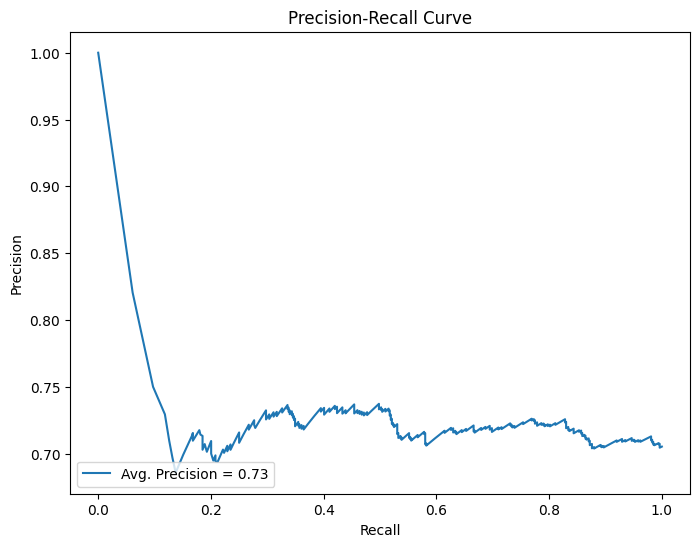

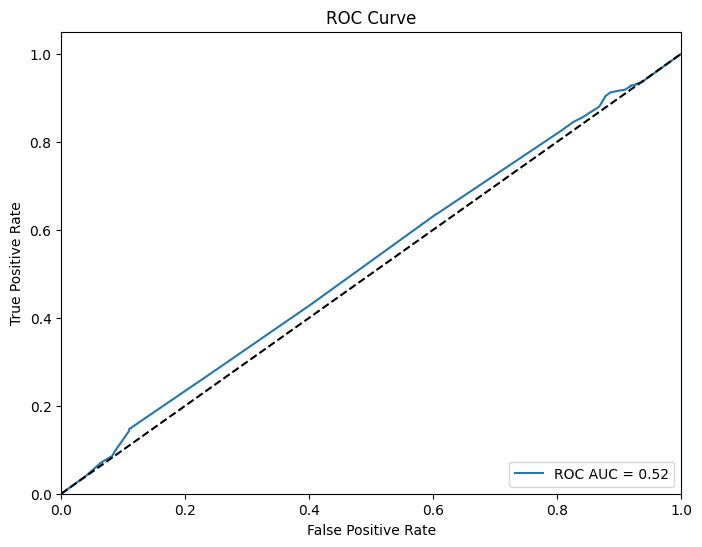

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_encoded[:, 1], y_pred_prob_class1)

# Calculate average precision score
average_precision = average_precision_score(y_test_encoded[:, 1], y_pred_prob_class1)

print("Average Precision:", average_precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Avg. Precision = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Plot ROC curve and ROC AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create a function to build your model
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train_final.shape[1],)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='swish'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation='gelu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(32, activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(16, activation='selu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
accuracy_scores = []
classification_reports = []

# Perform cross-validation
for train_index, val_index in cv.split(X_train_final, y_train_encoded[:, 1]):
    X_cv_train, X_cv_val = X_train_final[train_index], X_train_final[val_index]
    y_cv_train, y_cv_val = y_train_encoded[train_index], y_train_encoded[val_index]

    # Build and train the model
    model = build_model()
    model.fit(X_train_final, y_train_encoded, epochs=100, batch_size=64, validation_data=(X_cv_val, y_cv_val), verbose=0)


    # Evaluate the model on validation data
    y_cv_pred_prob = model.predict(X_cv_val)
    y_cv_pred_class1 = y_cv_pred_prob[:, 1]
    y_cv_pred_custom = (y_cv_pred_class1 > threshold).astype(int)

    # Calculate accuracy and classification report
    accuracy_cv = accuracy_score(y_cv_val[:, 1], y_cv_pred_custom)
    classification_report_cv = classification_report(y_cv_val, np.column_stack([1 - y_cv_pred_custom, y_cv_pred_custom]), target_names=class_names)

    accuracy_scores.append(accuracy_cv)
    classification_reports.append(classification_report_cv)

# Print cross-validation results
print("Cross-Validation Results:")
print("Accuracy Scores:", accuracy_scores)
for idx, report in enumerate(classification_reports):
    print(f"Fold {idx + 1} Classification Report:\n{report}\n")

# Calculate and print the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")


19/19 [==============================] - 0s 2ms/step
Cross-Validation Results:
Accuracy Scores: [1.0, 1.0, 1.0, 1.0, 1.0]
Fold 1 Classification Report:
              precision    recall  f1-score   support

       x0_No       1.00      1.00      1.00       161
      x0_Yes       1.00      1.00      1.00       433

   micro avg       1.00      1.00      1.00       594
   macro avg       1.00      1.00      1.00       594
weighted avg       1.00      1.00      1.00       594
 samples avg       1.00      1.00      1.00       594


Fold 2 Classification Report:
              precision    recall  f1-score   support

       x0_No       1.00      1.00      1.00       162
      x0_Yes       1.00      1.00      1.00       432

   micro avg       1.00      1.00      1.00       594
   macro avg       1.00      1.00      1.00       594
weighted avg       1.00      1.00      1.00       594
 samples avg       1.00      1.00      1.00       594


Fold 3 Classification Report:
              precision 